In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
from scipy.stats import f_oneway
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency

import statsmodels.api as sm

from imblearn.over_sampling import SMOTE

from sklearn import preprocessing

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, make_scorer

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
def data_info(data) :
    pd.set_option('display.max_rows',None)
    missing_values = data.isnull().sum()
    missing_perc = (missing_values/len(data))*100
    data_type = data.dtypes
    num_unique = data.nunique()

    print (f'Rows,Columns {data.shape}')
    print (f'Duplicated Values {data.duplicated().sum()}')
    print('=====\n')

    check_df = pd.DataFrame ({'missingValue' : missing_values,
                          'percentMissing' : missing_perc,
                          'DataType' : data_type,
                          'Unique' : num_unique}).sort_values('percentMissing',ascending=False)

    return check_df

In [4]:
def outlier(df,column) :
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3-q1
    lower = q1 - (1.5*iqr)
    upper = q3 + (1.5*iqr)

    outlier_count = 0

    def check_outlier(x):
        nonlocal outlier_count
        if x < lower or x > upper:
            outlier_count += 1
            return 'outlier'
        else:
            return 'not-outlier'

    outlier_list = df[column].apply(check_outlier)

    print (f' outlier lower limit : {lower} \n outlier upper limit : {upper}')
    print(f'Number of outliers: {outlier_count}')


In [5]:
def check_dependency (data, x, y) :

    obs_x = pd.crosstab(data[x],data[y])
    chi2, p, dof, expected = chi2_contingency(obs_x)
    alpha = 0.05

    print(f'=== V1: {x} === V2: {y} ===')


    if p<alpha :
        print (f'Chi-square Statistic : {chi2} \np-value: {p} < {alpha} \nV1 and V2 are dependent (significant association)')
        print()

    else :
        print (f'Chi-square Statistic : {chi2} \np-value: {p} > {alpha} \nV1 and V2 are independent (no significant association)')
        print()

In [6]:
def check_ttest (data, x) :
    churn_yes = data[data['Churn']==1][x]
    churn_no  = data[data['Churn']==0][x]

    alpha = 0.05
    t_stat_total , p_value = ttest_ind(churn_yes,churn_no)

    if p_value < alpha :
        print(x)
        print(f'p_value {p_value} < alpha {alpha}, t_stat_total = {t_stat_total}')
        print('There are significant differences between target and predictor\n')

    else :
        print(x)
        print(f'p_value {p_value} > alpha {alpha}, t_stat_total = {t_stat_total}')
        print('There are NO significant differences between target and predicto\n')

In [7]:
def train_eval (X, y, model) :
    model.fit(X, y)
    pred = model.predict(X)

    cm = confusion_matrix(y, pred)
    disp = ConfusionMatrixDisplay(confusion_matrix = cm,
                                  display_labels=model.classes_)

    print(f'Confusion Matrix : \n{cm}\n')
    print(f' Accuracy : {accuracy_score(y, pred)}')
    print(f' Recall Score : {recall_score(y, pred)}')
    print(f' Precision Score : {precision_score(y, pred)}')
    print(f' F1 Score : {f1_score(y, pred)}')
    print(f' ROC-AUC Score : {roc_auc_score(y,model.predict_proba(X)[:,1])}')
    print()
    cross_val_recall(X, y, model)

    disp.plot()

In [8]:
def test_eval (X, y, model) :
    pred = model.predict(X)

    cm = confusion_matrix(y, pred)
    disp = ConfusionMatrixDisplay(confusion_matrix = cm,
                                  display_labels=model.classes_)

    print(f'Confusion Matrix : \n{cm}\n')
    print(f' Accuracy : {accuracy_score(y, pred)}')
    print(f' Recall Score : {recall_score(y, pred)}')
    print(f' Precision Score : {precision_score(y, pred)}')
    print(f' F1 Score : {f1_score(y, pred)}')
    print(f' ROC-AUC Score : {roc_auc_score(y,model.predict_proba(X)[:,1])}')

    disp.plot()

In [9]:
def cross_val_recall (X, y, model) :
  cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
  recall_scorer = make_scorer(recall_score)

  recall_scores = cross_val_score(model, X, y, cv=cv, scoring=recall_scorer)

  print(" Recall scores for each fold:", recall_scores)
  print(" Average recall score:", recall_scores.mean())

In [10]:
data_info(df)

Rows,Columns (7043, 21)
Duplicated Values 0
=====



,missingValue,percentMissing,DataType,Unique
customerID,0,0.0,object,7043
DeviceProtection,0,0.0,object,3
TotalCharges,0,0.0,object,6531
MonthlyCharges,0,0.0,float64,1585
PaymentMethod,0,0.0,object,4
PaperlessBilling,0,0.0,object,2
Contract,0,0.0,object,3
StreamingMovies,0,0.0,object,3
StreamingTV,0,0.0,object,3
TechSupport,0,0.0,object,3


In [11]:
df_ori = df.copy()

# turn TotalCharges from object to float64, making it same type as MonthlyCharges for easier processing
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# turn Churn target data to be int for predicting
df['Churn']= df['Churn'].replace(['No' ,'Yes'],[0,1])

In [12]:
data_info(df)

Rows,Columns (7043, 21)
Duplicated Values 0
=====



,missingValue,percentMissing,DataType,Unique
TotalCharges,11,0.156183,float64,6530
customerID,0,0.000000,object,7043
DeviceProtection,0,0.000000,object,3
MonthlyCharges,0,0.000000,float64,1585
PaymentMethod,0,0.000000,object,4
PaperlessBilling,0,0.000000,object,2
Contract,0,0.000000,object,3
StreamingMovies,0,0.000000,object,3
StreamingTV,0,0.000000,object,3
TechSupport,0,0.000000,object,3


In [13]:
df[df['TotalCharges'].isna()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,0
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,0
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,0
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,0
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,0
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,0
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,0
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,0
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,0
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,0


In [14]:
# drop rows where TotalCharges isNaN and do not create a new dataset
df = df[df['TotalCharges'].notna()].reset_index(drop=True)

In [15]:
data_info(df)

Rows,Columns (7032, 21)
Duplicated Values 0
=====



,missingValue,percentMissing,DataType,Unique
customerID,0,0.0,object,7032
DeviceProtection,0,0.0,object,3
TotalCharges,0,0.0,float64,6530
MonthlyCharges,0,0.0,float64,1584
PaymentMethod,0,0.0,object,4
PaperlessBilling,0,0.0,object,2
Contract,0,0.0,object,3
StreamingMovies,0,0.0,object,3
StreamingTV,0,0.0,object,3
TechSupport,0,0.0,object,3


In [16]:
#check each data for uniqueness
df_columns = df.columns.tolist()
for column in df_columns:
    print(f"{column} : {df[column].unique()}")
    print('\n')

customerID : ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']


gender : ['Female' 'Male']


SeniorCitizen : [0 1]


Partner : ['Yes' 'No']


Dependents : ['No' 'Yes']


tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]


PhoneService : ['No' 'Yes']


MultipleLines : ['No phone service' 'No' 'Yes']


InternetService : ['DSL' 'Fiber optic' 'No']


OnlineSecurity : ['No' 'Yes' 'No internet service']


OnlineBackup : ['Yes' 'No' 'No internet service']


DeviceProtection : ['No' 'Yes' 'No internet service']


TechSupport : ['No' 'Yes' 'No internet service']


StreamingTV : ['No' 'Yes' 'No internet service']


StreamingMovies : ['No' 'Yes' 'No internet service']


Contract : ['Month-to-month' 'One year' 'Two year']


PaperlessBilling : ['Yes' 'No']


PaymentMethod : ['Electronic 

In [17]:
new_df = df.copy()
df_ori = df.copy()

In [18]:
new_df['PhoneService'] = new_df['PhoneService'].replace(['No' ,'Yes'],[0,1])

# Replace 'No' with 0, 'Yes' with 1, and 'No phone service' with 0 in the 'MultipleLines' column
new_df['MultipleLines'] = new_df['MultipleLines'].replace(['No' ,'Yes', 'No phone service'],[0, 1, 0])

# Replace 'No' with 0, 'Fiber optic' with 1, and 'DSL' with 0 in the 'InternetService' column
new_df['InternetService'] = new_df['InternetService'].replace({'No': 0, 'Fiber optic': 1, 'DSL': 1})

# Replace 'No' with 0, 'Yes' with 1, and 'No internet service' with 0 in the 'OnlineSecurity' column
new_df['OnlineSecurity'] = new_df['OnlineSecurity'].replace(['No' ,'Yes', 'No internet service'],[0, 1, 0])

# Replace 'No' with 0, 'Yes' with 1, and 'No internet service' with 0 in the 'OnlineBackup' column
new_df['OnlineBackup'] = new_df['OnlineBackup'].replace(['No' ,'Yes', 'No internet service'],[0, 1, 0])

# Replace 'No' with 0, 'Yes' with 1, and 'No internet service' with 0 in the 'DeviceProtection' column
new_df['DeviceProtection'] = new_df['DeviceProtection'].replace(['No' ,'Yes', 'No internet service'],[0, 1, 0])

# Replace 'No' with 0, 'Yes' with 1, and 'No internet service' with 0 in the 'TechSupport' column
new_df['TechSupport'] = new_df['TechSupport'].replace(['No' ,'Yes', 'No internet service'],[0, 1, 0])

# Replace 'No' with 0, 'Yes' with 1, and 'No internet service' with 0 in the 'StreamingTV' column
new_df['StreamingTV'] = new_df['StreamingTV'].replace(['No' ,'Yes', 'No internet service'],[0, 1, 0])

# Replace 'No' with 0, 'Yes' with 1, and 'No internet service' with 0 in the 'StreamingMovies' column
new_df['StreamingMovies'] = new_df['StreamingMovies'].replace(['No' ,'Yes', 'No internet service'],[0, 1, 0])

In [19]:
new_df['SubscribedServices'] = new_df[['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'StreamingMovies', 'StreamingTV', 'TechSupport', 'DeviceProtection']].sum(axis=1)
df['SubscribedServices'] = new_df[['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'StreamingMovies', 'StreamingTV', 'TechSupport', 'DeviceProtection']].sum(axis=1)

In [20]:
new_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,SubscribedServices
0,7590-VHVEG,Female,0,Yes,No,1,0,0,1,0,...,0,0,0,Month-to-month,Yes,Electronic check,29.85,29.85,0,2
1,5575-GNVDE,Male,0,No,No,34,1,0,1,1,...,0,0,0,One year,No,Mailed check,56.95,1889.50,0,4
2,3668-QPYBK,Male,0,No,No,2,1,0,1,1,...,0,0,0,Month-to-month,Yes,Mailed check,53.85,108.15,1,4
3,7795-CFOCW,Male,0,No,No,45,0,0,1,1,...,1,0,0,One year,No,Bank transfer (automatic),42.30,1840.75,0,4
4,9237-HQITU,Female,0,No,No,2,1,0,1,0,...,0,0,0,Month-to-month,Yes,Electronic check,70.70,151.65,1,2


In [21]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,SubscribedServices
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,2
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,0,4
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,4
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,4
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,2


In [22]:
data_info(new_df)

Rows,Columns (7032, 22)
Duplicated Values 0
=====



,missingValue,percentMissing,DataType,Unique
customerID,0,0.0,object,7032
gender,0,0.0,object,2
Churn,0,0.0,int64,2
TotalCharges,0,0.0,float64,6530
MonthlyCharges,0,0.0,float64,1584
PaymentMethod,0,0.0,object,4
PaperlessBilling,0,0.0,object,2
Contract,0,0.0,object,3
StreamingMovies,0,0.0,int64,2
StreamingTV,0,0.0,int64,2


In [23]:
# group column names
numerical = ['SeniorCitizen','tenure','MonthlyCharges', 'TotalCharges','Churn']
categorical = ['gender','Partner', 'Dependents','PhoneService', 'MultipleLines',
               'InternetService', 'OnlineSecurity','OnlineBackup', 'DeviceProtection',
               'TechSupport', 'StreamingTV','StreamingMovies', 'Contract', 'PaperlessBilling',
               'PaymentMethod']

customerDemographic = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']
services = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
customerAccInfo = ['Contract', 'PaperlessBilling', 'PaymentMethod']
customerSpending = ['tenure', 'MonthlyCharges', 'TotalCharges']

In [24]:
#numerical analysis
df[numerical].describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7032.0,0.162400,0.368844,0.00,0.0000,0.000,0.0000,1.00
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
MonthlyCharges,7032.0,64.798208,30.085974,18.25,35.5875,70.350,89.8625,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.4500,1397.475,3794.7375,8684.80
Churn,7032.0,0.265785,0.441782,0.00,0.0000,0.000,1.0000,1.00


In [25]:
#categorical analysis
df[categorical].describe().T

,count,unique,top,freq
gender,7032,2,Male,3549
Partner,7032,2,No,3639
Dependents,7032,2,No,4933
PhoneService,7032,2,Yes,6352
MultipleLines,7032,3,No,3385
InternetService,7032,3,Fiber optic,3096
OnlineSecurity,7032,3,No,3497
OnlineBackup,7032,3,No,3087
DeviceProtection,7032,3,No,3094
TechSupport,7032,3,No,3472


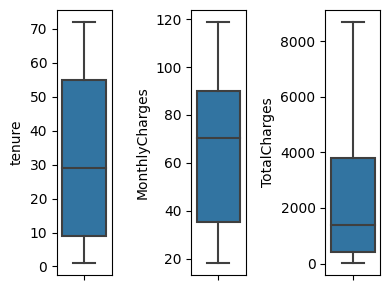

In [26]:
features = customerSpending
plt.figure(figsize=(4,3))
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y = df[features[i]])
    plt.tight_layout()

In [27]:
outlier(df, 'tenure')

 outlier lower limit : -60.0 
 outlier upper limit : 124.0
Number of outliers: 0


In [28]:
outlier(df, 'MonthlyCharges')

 outlier lower limit : -45.824999999999996 
 outlier upper limit : 171.27499999999998
Number of outliers: 0


In [29]:
outlier(df, 'TotalCharges')

 outlier lower limit : -4688.481250000001 
 outlier upper limit : 8884.66875
Number of outliers: 0


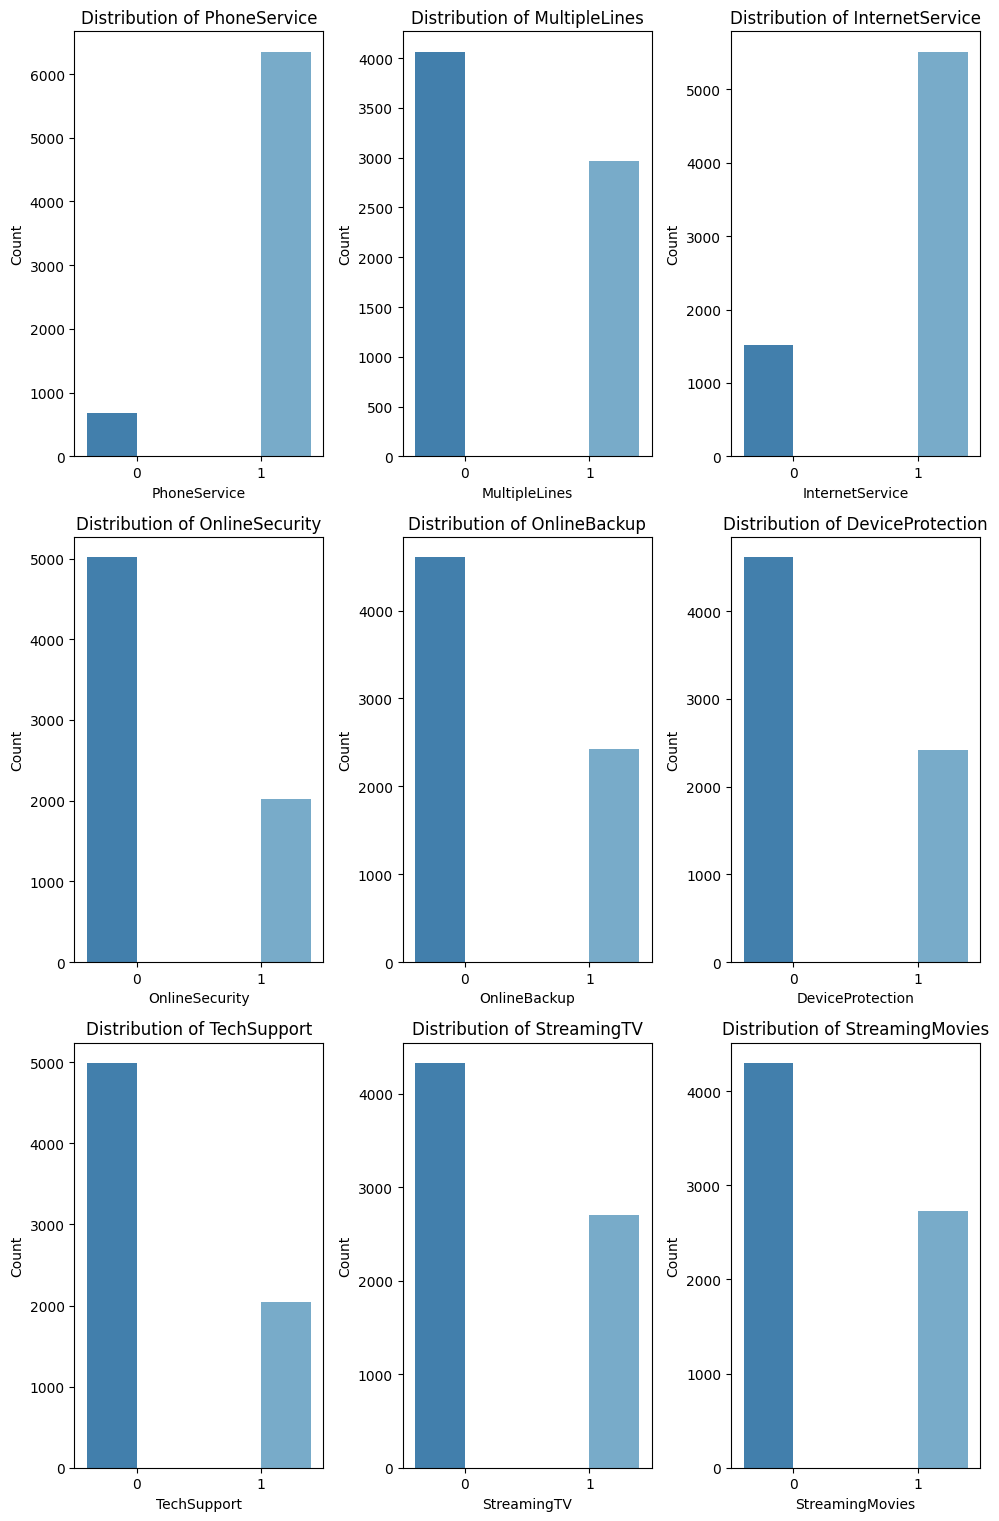

In [31]:
num_rows = len(services) // 2 + len(services) % 2
plt.figure(figsize=(10, 5 * num_rows))

for i, col in enumerate(services, start=1):
    plt.subplot(num_rows, 3, i)
    sns.countplot(x=col, hue=col, data=new_df, palette = "tab20c")
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.legend([], frameon=False)

plt.tight_layout()
plt.show()

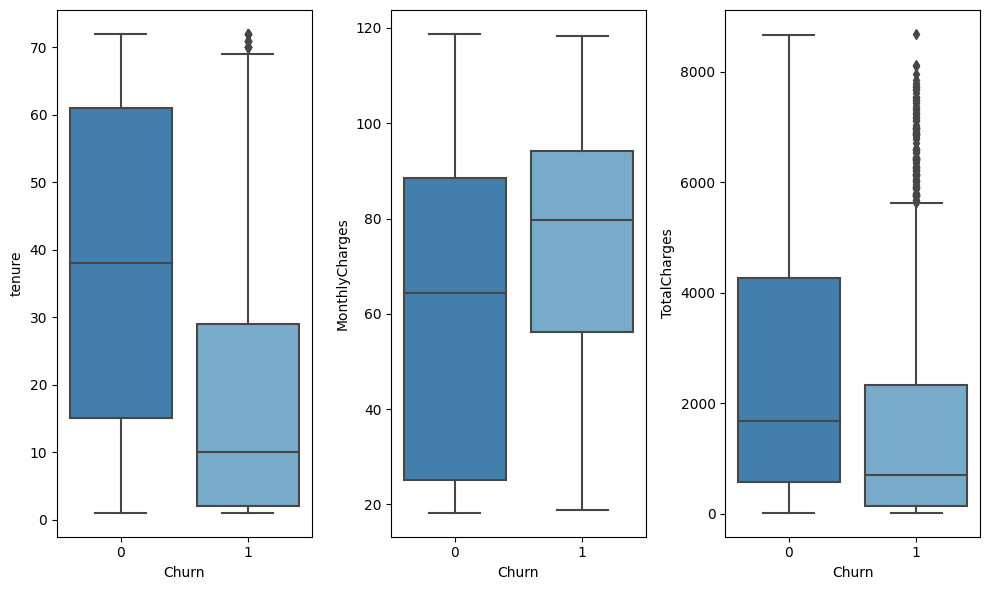

In [32]:
plt.figure(figsize=(10,6))

for x in range(0, len(customerSpending)):
    plt.subplot(1, len(customerSpending), x+1)
    sns.boxplot(x=new_df['Churn'],y=new_df[customerSpending[x]], palette = "tab20c")
    plt.tight_layout()

In [33]:
new_df[(new_df['TotalCharges']>=5800)&(new_df['Churn']==1)]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,SubscribedServices
104,3192-NQECA,Male,0,Yes,No,68,1,1,1,0,...,1,1,1,Two year,Yes,Bank transfer (automatic),110.00,7611.85,1,8
339,1343-EHPYB,Male,0,Yes,No,63,1,1,1,0,...,0,1,1,Month-to-month,Yes,Electronic check,103.40,6603.00,1,7
402,0979-PHULV,Male,0,Yes,Yes,69,1,1,1,0,...,0,1,1,Month-to-month,Yes,Credit card (automatic),99.45,7007.60,1,6
445,7752-XUSCI,Female,0,No,No,60,1,1,1,0,...,0,1,1,Month-to-month,Yes,Electronic check,105.90,6396.45,1,7
608,3419-SNJJD,Female,1,Yes,No,65,1,1,1,1,...,0,1,1,Month-to-month,No,Bank transfer (automatic),105.25,6786.40,1,7
634,7207-RMRDB,Female,0,Yes,Yes,65,1,1,1,0,...,0,1,1,Month-to-month,Yes,Electronic check,105.50,6985.65,1,7
797,3009-JWMPU,Male,0,No,No,62,1,1,1,0,...,0,1,1,One year,Yes,Electronic check,96.75,6125.40,1,6
808,2239-JALAW,Male,0,No,No,58,1,1,1,0,...,0,1,1,One year,Yes,Bank transfer (automatic),103.25,6017.65,1,7
809,4853-RULSV,Male,0,No,No,70,1,1,1,1,...,1,1,1,Two year,Yes,Credit card (automatic),104.00,7250.15,1,7
853,2382-BCKQJ,Female,0,No,Yes,62,1,1,1,0,...,0,1,1,One year,Yes,Electronic check,100.15,6413.65,1,6


In [34]:
new_df[(new_df['tenure']>=69)&(new_df['Churn']==1)]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,SubscribedServices
402,0979-PHULV,Male,0,Yes,Yes,69,1,1,1,0,...,0,1,1,Month-to-month,Yes,Credit card (automatic),99.45,7007.60,1,6
809,4853-RULSV,Male,0,No,No,70,1,1,1,1,...,1,1,1,Two year,Yes,Credit card (automatic),104.00,7250.15,1,7
972,2834-JRTUA,Male,0,No,No,71,1,1,1,1,...,1,1,1,Two year,Yes,Electronic check,108.05,7532.15,1,8
1302,0201-OAMXR,Female,0,No,No,70,1,1,1,1,...,1,1,1,One year,No,Credit card (automatic),115.55,8127.60,1,9
1962,0565-IYCGT,Male,0,No,No,69,1,1,1,1,...,1,0,1,One year,Yes,Credit card (automatic),78.60,5356.45,1,8
2282,5440-FLBQG,Male,1,Yes,No,69,1,1,1,0,...,1,1,1,Two year,Yes,Bank transfer (automatic),108.40,7318.20,1,8
2874,4550-VBOFE,Male,1,Yes,No,70,1,1,1,0,...,0,1,1,Month-to-month,Yes,Electronic check,102.95,7101.50,1,7
2992,1891-FZYSA,Male,1,Yes,No,69,1,1,1,0,...,0,1,0,Month-to-month,Yes,Electronic check,89.95,6143.15,1,5
3035,7317-GGVPB,Male,0,Yes,No,71,1,1,1,0,...,1,1,1,Two year,Yes,Credit card (automatic),108.60,7690.90,1,8
3106,8809-RIHDD,Male,0,Yes,Yes,72,1,1,1,0,...,0,1,1,Two year,Yes,Electronic check,103.40,7372.65,1,7


In [35]:
def predictor_target(data, pred, tgt='Churn'):
    service_churn_rate = data.groupby(pred)[tgt].value_counts(normalize=True).unstack().fillna(0) * 100
    service_churn_rate = service_churn_rate.reset_index().melt(id_vars=pred, value_vars=[0, 1], var_name='Churn', value_name='ChurnRate')
    ax = sns.barplot(x=pred, y='ChurnRate', hue='Churn', data=service_churn_rate)
    
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height:.1f}%', (p.get_x() + p.get_width() / 2., height / 2.), ha='center', va='center', fontsize=10, color='black')

    plt.title(f'Churn Rate (%) of {pred}')
    plt.xlabel(pred)
    plt.ylabel('Churn Rate')
    plt.ylim(0,100)

In [36]:
def pred_tgt_list(data, features, columns=1, width=10, height=5):
  num_rows = len(features) // 2 + len(features) % 2
  plt.figure(figsize=(width, height * num_rows))

  for i, col in enumerate(features, start=1):
      plt.subplot(num_rows, columns, i)
      predictor_target(data, col)

  plt.tight_layout()
  plt.show()

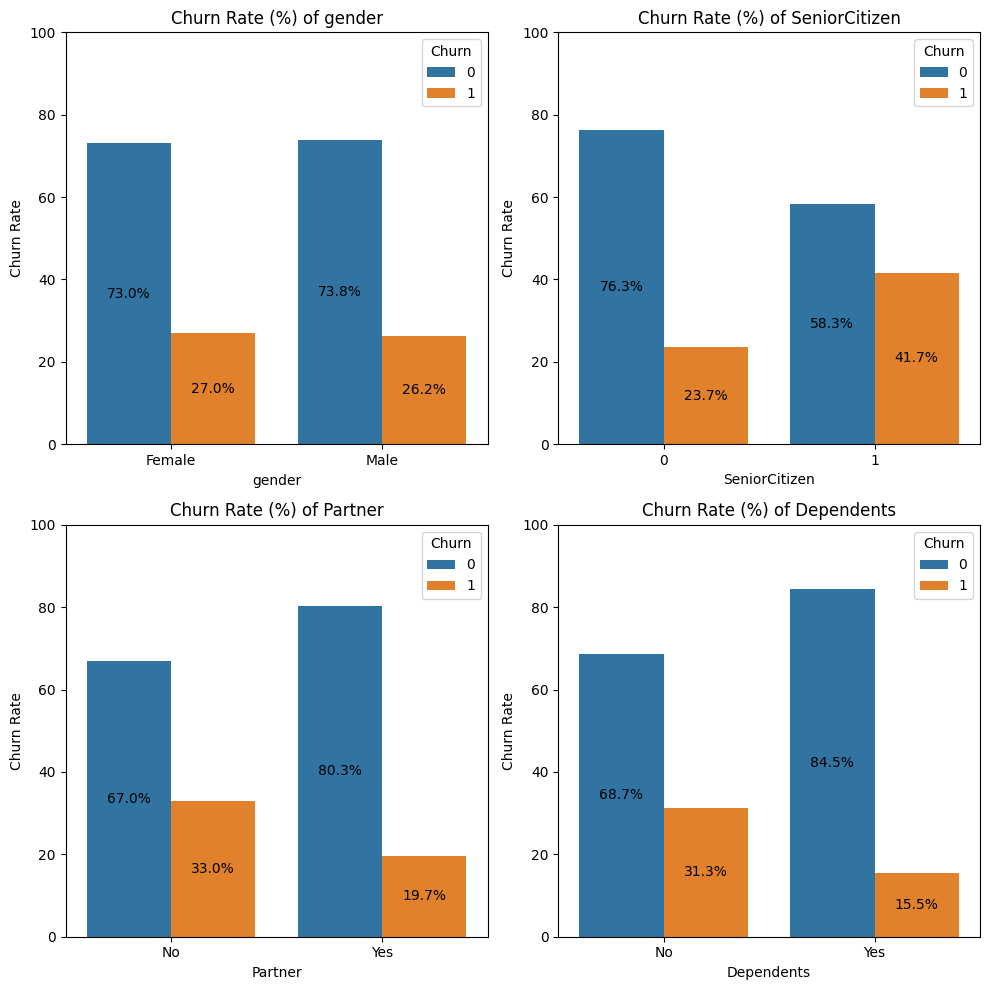

In [37]:
pred_tgt_list(new_df, customerDemographic, 2)

In [38]:
for x in customerDemographic :
    check_dependency(new_df, x,'Churn')

=== V1: gender === V2: Churn ===
Chi-square Statistic : 0.47545453727386294 
p-value: 0.490488470706551 > 0.05 
V1 and V2 are independent (no significant association)

=== V1: SeniorCitizen === V2: Churn ===
Chi-square Statistic : 158.4408162893713 
p-value: 2.4792557203954705e-36 < 0.05 
V1 and V2 are dependent (significant association)

=== V1: Partner === V2: Churn ===
Chi-square Statistic : 157.50315146557506 
p-value: 3.97379757451591e-36 < 0.05 
V1 and V2 are dependent (significant association)

=== V1: Dependents === V2: Churn ===
Chi-square Statistic : 186.32163933855873 
p-value: 2.0196592017051303e-42 < 0.05 
V1 and V2 are dependent (significant association)



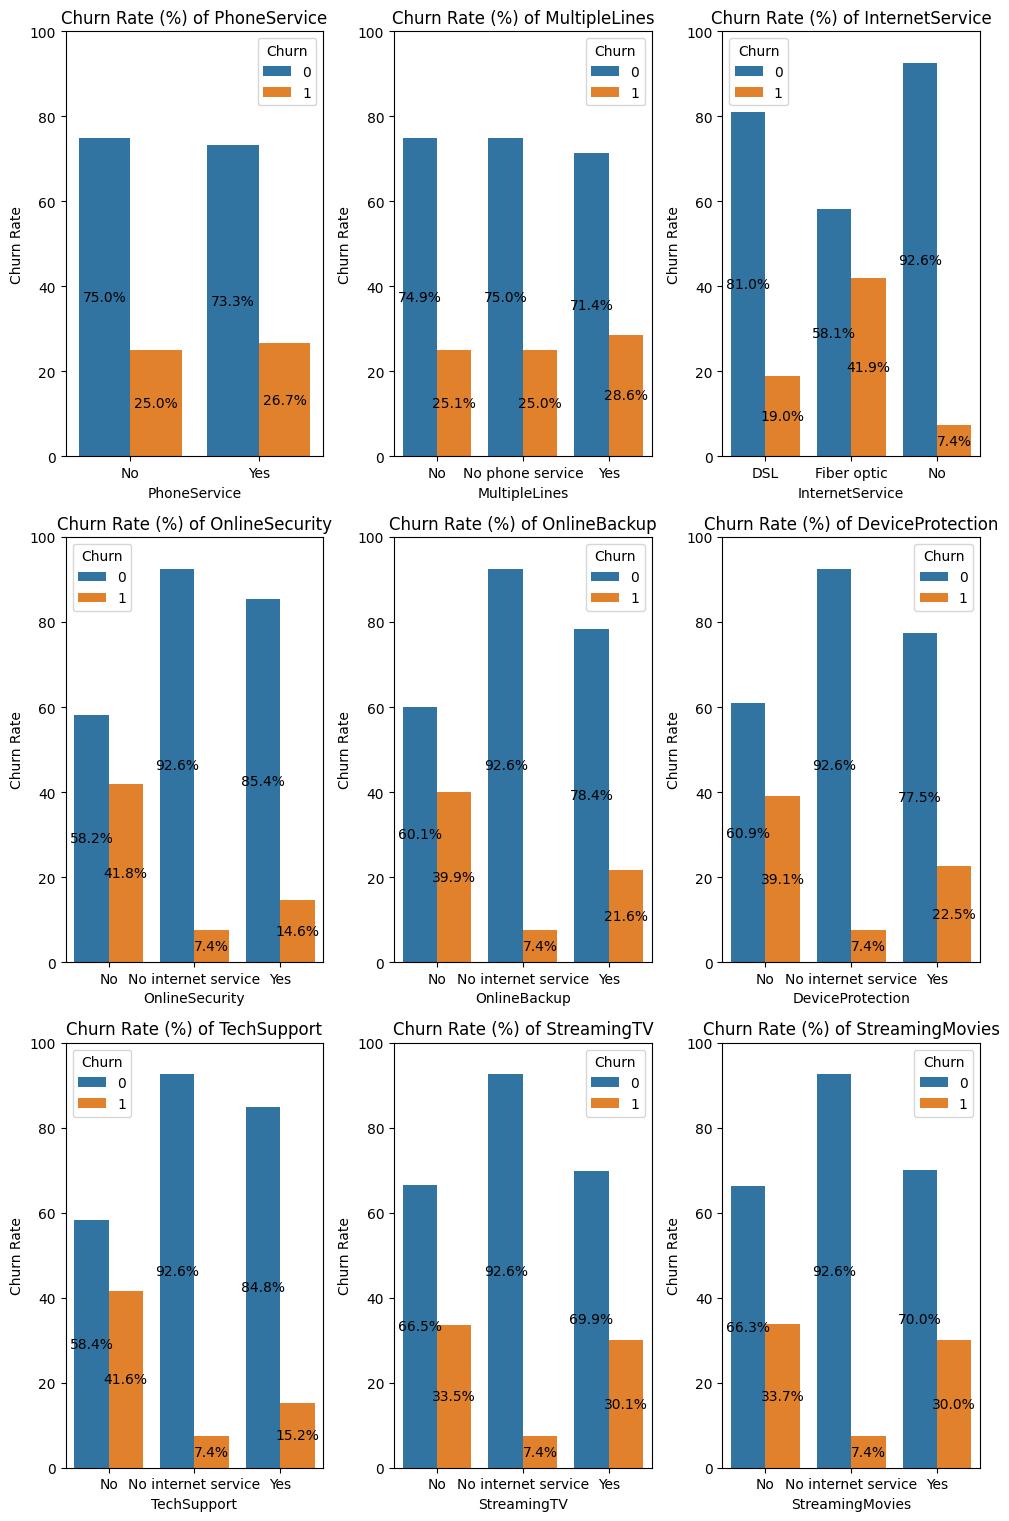

In [39]:
pred_tgt_list(df, services, 3)

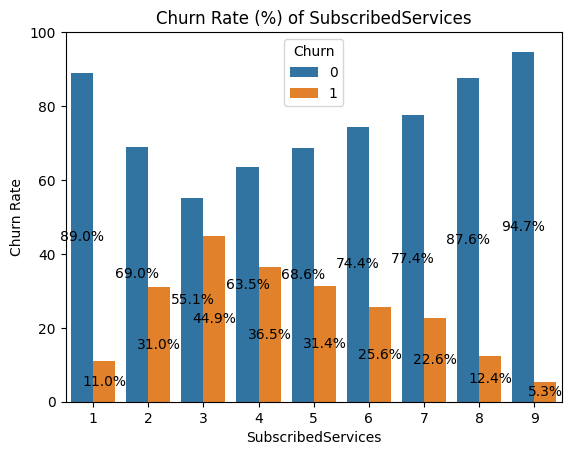

In [40]:
predictor_target(new_df, 'SubscribedServices')
plt.show()

In [41]:
for x in services :
    check_dependency(new_df, x,'Churn')

=== V1: PhoneService === V2: Churn ===
Chi-square Statistic : 0.8737327674431736 
p-value: 0.34992398942431924 > 0.05 
V1 and V2 are independent (no significant association)

=== V1: MultipleLines === V2: Churn ===
Chi-square Statistic : 11.08687591455858 
p-value: 0.0008694082815826175 < 0.05 
V1 and V2 are dependent (significant association)

=== V1: InternetService === V2: Churn ===
Chi-square Statistic : 362.94784884289265 
p-value: 6.4225207979072035e-81 < 0.05 
V1 and V2 are dependent (significant association)

=== V1: OnlineSecurity === V2: Churn ===
Chi-square Statistic : 205.41578737378245 
p-value: 1.37424000884718e-46 < 0.05 
V1 and V2 are dependent (significant association)

=== V1: OnlineBackup === V2: Churn ===
Chi-square Statistic : 47.246659325881964 
p-value: 6.259257129714726e-12 < 0.05 
V1 and V2 are dependent (significant association)

=== V1: DeviceProtection === V2: Churn ===
Chi-square Statistic : 30.49569910229676 
p-value: 3.346074945648779e-08 < 0.05 
V1 and V

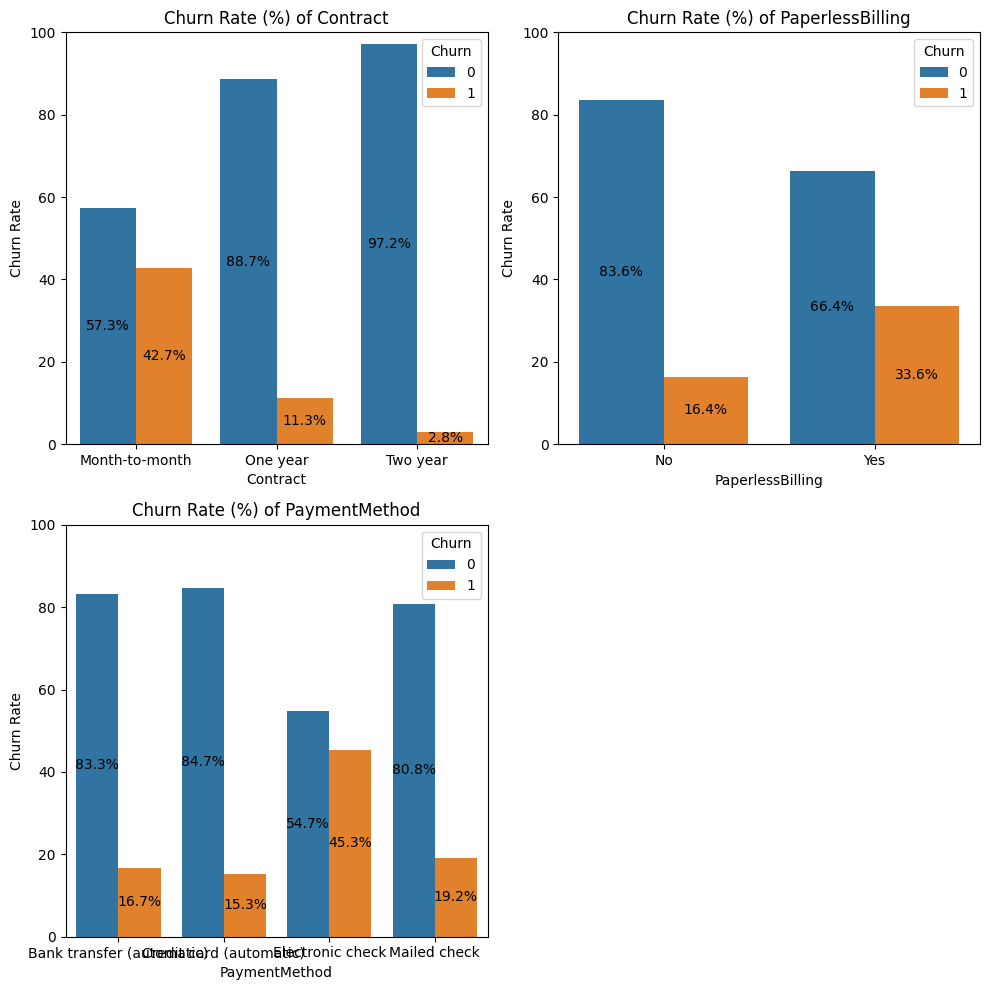

In [42]:
pred_tgt_list(df, customerAccInfo, 2, 10, 5)

In [43]:
for i in customerAccInfo :
    check_dependency(new_df, i,'Churn')

=== V1: Contract === V2: Churn ===
Chi-square Statistic : 1179.5458287339445 
p-value: 7.326182186265472e-257 < 0.05 
V1 and V2 are dependent (significant association)

=== V1: PaperlessBilling === V2: Churn ===
Chi-square Statistic : 256.87490836218717 
p-value: 8.236203353962564e-58 < 0.05 
V1 and V2 are dependent (significant association)

=== V1: PaymentMethod === V2: Churn ===
Chi-square Statistic : 645.4299001234638 
p-value: 1.4263098511063342e-139 < 0.05 
V1 and V2 are dependent (significant association)



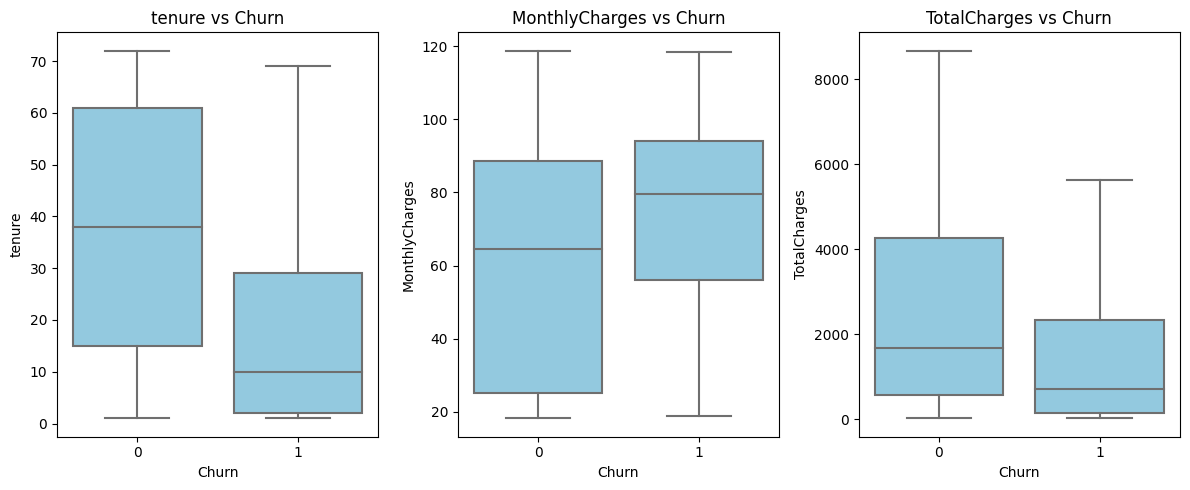

In [44]:
plt.figure(figsize=(12,5))

for i in range(0, len(customerSpending)):
    plt.subplot(1, len(customerSpending), i+1)
    sns.boxplot(x=new_df['Churn'],y=new_df[customerSpending[i]], color='skyblue',showfliers=False)
    plt.title(f'{customerSpending[i]} vs Churn')
    plt.tight_layout()

In [45]:
def predictor_target_num(data_frame, pred, tgt='Churn'):
  churn_rate = data_frame.groupby(tgt)[pred].mean().reset_index()
  ax = sns.barplot(x=tgt, y=pred, data=churn_rate, color='skyblue')

  for p in ax.patches:
      height = p.get_height()
      ax.annotate(f'{height:.1f}',
                  (p.get_x() + p.get_width() / 2., height / 2.),
                  ha='center', va='center',
                  fontsize=10, color='black')

  ax.set_ylabel('Churn Rate')
  ax.set_title(f'Churn Rate by Average {pred}')

  plt.show()

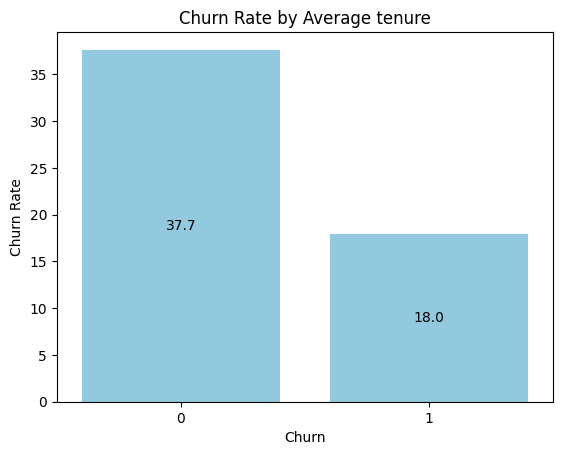

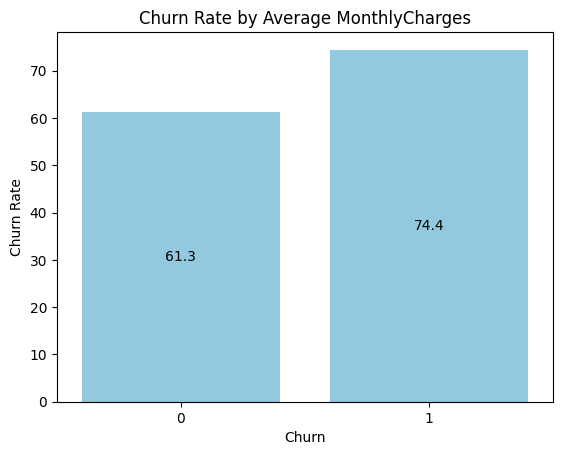

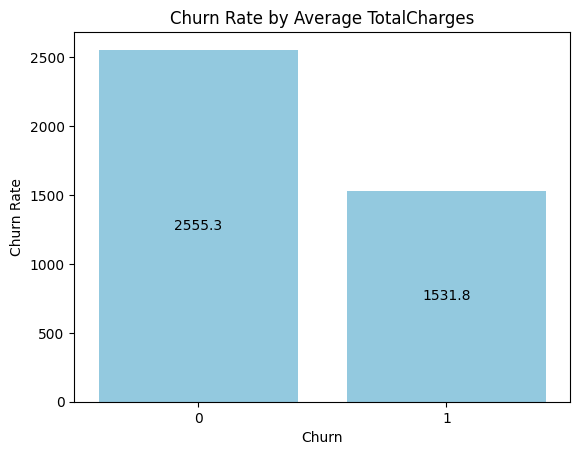

In [46]:
for i in customerSpending:
  predictor_target_num(new_df, i)

In [48]:
# churn_rate = new_df.groupby('Churn')['tenure'].mean().reset_index()
# sns.lineplot(x='tenure', y='Churn', data=new_df)

# plt.title('Average tenure of Churn Rate (%)')
# plt.show()

In [49]:
for i in customerSpending :
    check_ttest(new_df, i)

tenure
p_value 9.437650217574845e-207 < alpha 0.05, t_stat_total = -31.741289063447653
There are significant differences between target and predictor

MonthlyCharges
p_value 6.760843117980302e-60 < alpha 0.05, t_stat_total = 16.47959313114872
There are significant differences between target and predictor

TotalCharges
p_value 4.876865689694506e-64 < alpha 0.05, t_stat_total = -17.068827211220274
There are significant differences between target and predictor



In [50]:
# define function to check mean of certain service based on MonthlyCharges
def avg_service_price(data_frame, service_column, charges_column='MonthlyCharges'):
    new_col_name = f'{service_column}-Charges'
    grouped_df = data_frame.groupby(service_column).agg(average_charges=(charges_column, 'mean')).reset_index()
    grouped_df = grouped_df.rename(columns={service_column: 'Service', 'average_charges': new_col_name})
    
    return grouped_df

In [51]:
df_1 = avg_service_price(df, 'InternetService')
df_1

,Service,InternetService-Charges
0,DSL,58.088017
1,Fiber optic,91.500129
2,No,21.076283


In [52]:
# since we want to know the price of internetService, we exclude "No" due to the fact it does not contain any InternetService
df_1 = df_1[df_1['Service']!='No']
df_1 = df_1.replace(['DSL','Fiber optic'],[0,1])
df_1

,Service,InternetService-Charges
0,0,58.088017
1,1,91.500129


In [53]:
df_2 = avg_service_price(new_df, 'MultipleLines')
df_2

,Service,MultipleLines-Charges
0,0,52.180935
1,1,82.084766


In [54]:
df_3 = avg_service_price(new_df, 'OnlineSecurity')
df_3

,Service,OnlineSecurity-Charges
0,0,59.146293
1,1,78.870496


In [55]:
df_4 = avg_service_price(new_df, 'OnlineBackup')
df_4

,Service,OnlineBackup-Charges
0,0,55.161265
1,1,83.106412


In [56]:
df_5 = avg_service_price(new_df, 'DeviceProtection')
df_5

,Service,DeviceProtection-Charges
0,0,54.287885
1,1,84.853888


In [57]:
df_6 = avg_service_price(new_df, 'TechSupport')
df_6

,Service,TechSupport-Charges
0,0,58.292198
1,1,80.718799


In [58]:
df_7 = avg_service_price(new_df, 'StreamingTV')
df_7

,Service,StreamingTV-Charges
0,0,49.829857
1,1,88.770829


In [59]:
df_8 = avg_service_price(new_df, 'StreamingMovies')
df_8

,Service,StreamingMovies-Charges
0,0,49.761962
1,1,88.478506


In [60]:
from functools import reduce

In [61]:
df_total_service = [df_1,df_2,df_3,df_4,df_5,df_6,df_7,df_8]

df_avg_service = reduce(lambda  left,right: pd.merge(left,right,on=['Service'],
                                            how='outer'), df_total_service)
df_avg_service

,Service,InternetService-Charges,MultipleLines-Charges,OnlineSecurity-Charges,OnlineBackup-Charges,DeviceProtection-Charges,TechSupport-Charges,StreamingTV-Charges,StreamingMovies-Charges
0,0,58.088017,52.180935,59.146293,55.161265,54.287885,58.292198,49.829857,49.761962
1,1,91.500129,82.084766,78.870496,83.106412,84.853888,80.718799,88.770829,88.478506


In [62]:
df_avg_service = df_avg_service.drop('Service',axis=1)

Text(0, 0.5, 'Ave Monthly Charges')

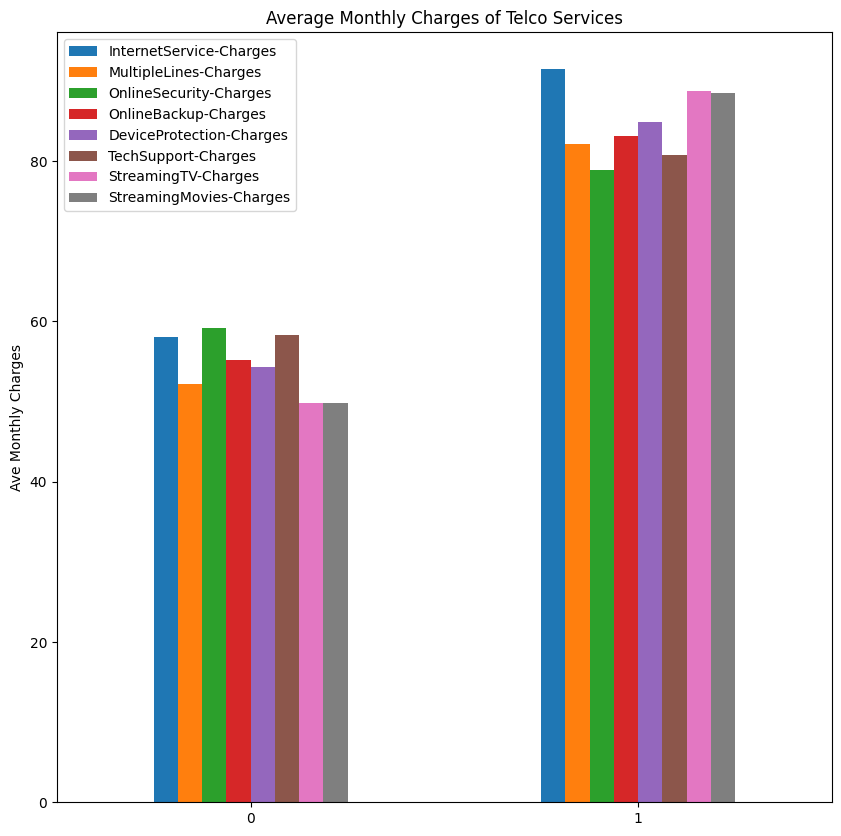

In [63]:
df_avg_service.plot(kind='bar',figsize=(10,10))
plt.title('Average Monthly Charges of Telco Services')
plt.xticks(rotation=0)
plt.ylabel('Ave Monthly Charges')

In [64]:
def plot_boxplot(hue_column, data=new_df, x_axis='SubscribedServices', y_axis='MonthlyCharges'):
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=data, x=x_axis, y=y_axis, hue=hue_column, showfliers=False)
    
    plt.ylabel(y_axis)
    plt.title(f'Distribution of {y_axis} by {hue_column} in {x_axis}', fontsize=16)
    plt.show

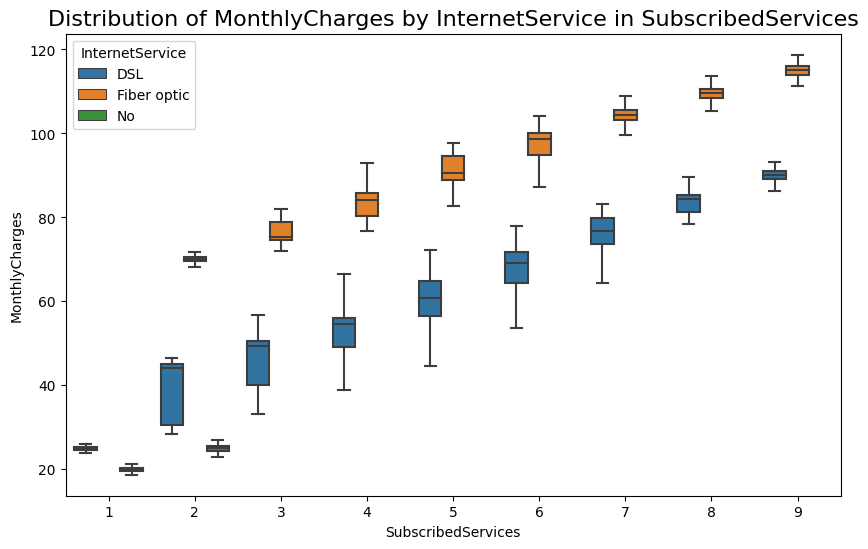

In [65]:
plot_boxplot('InternetService', df)

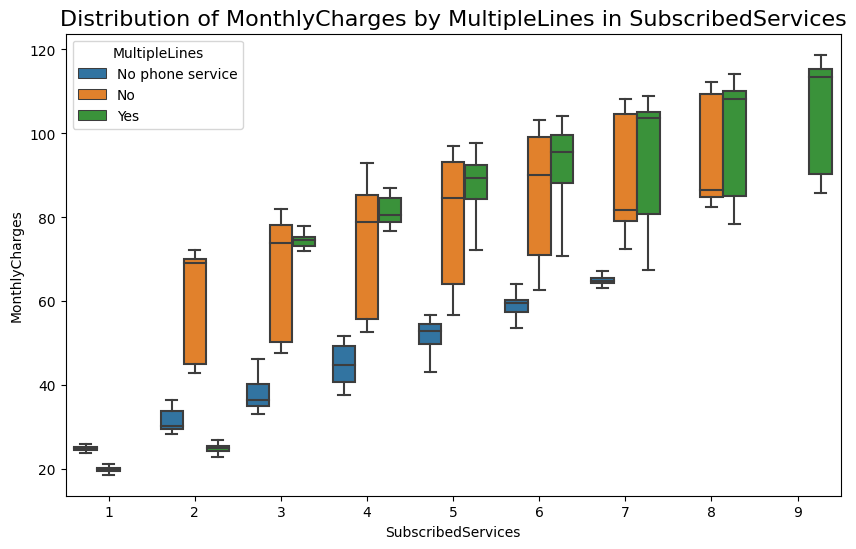

In [66]:
plot_boxplot('MultipleLines', df)

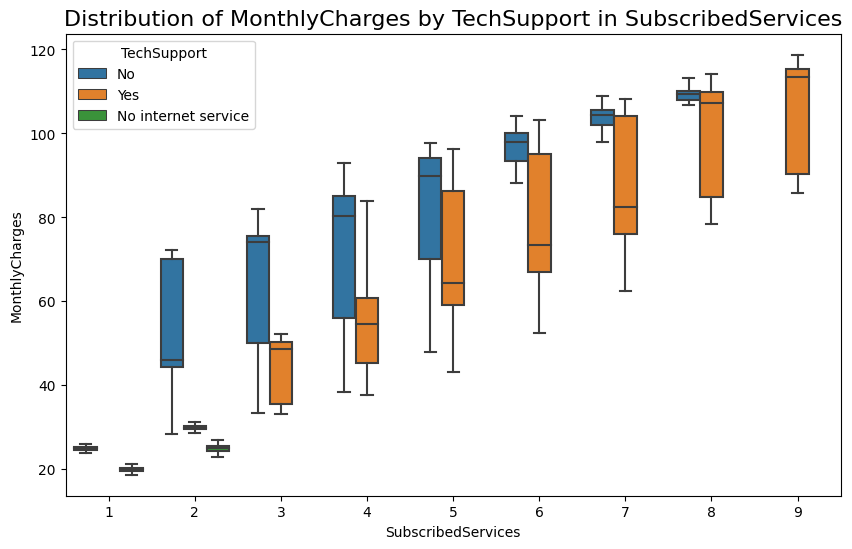

In [67]:
plot_boxplot('TechSupport', df)

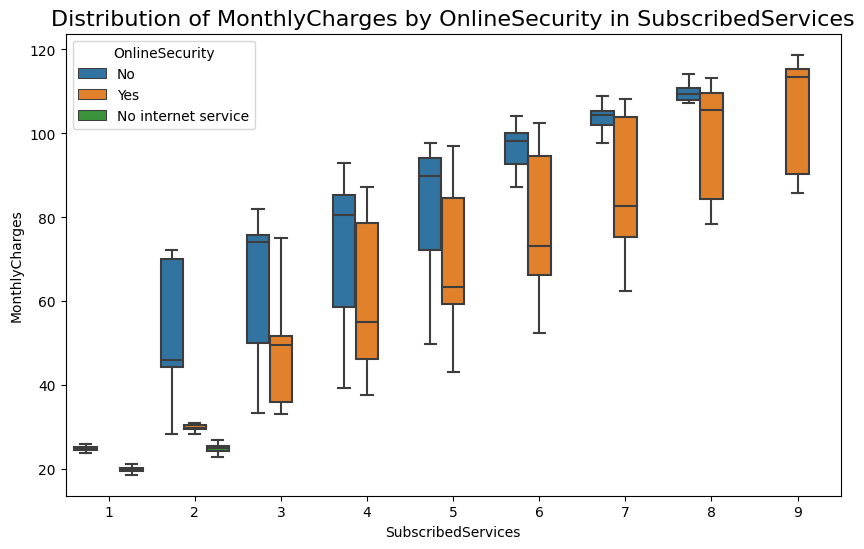

In [68]:
plot_boxplot('OnlineSecurity', df)

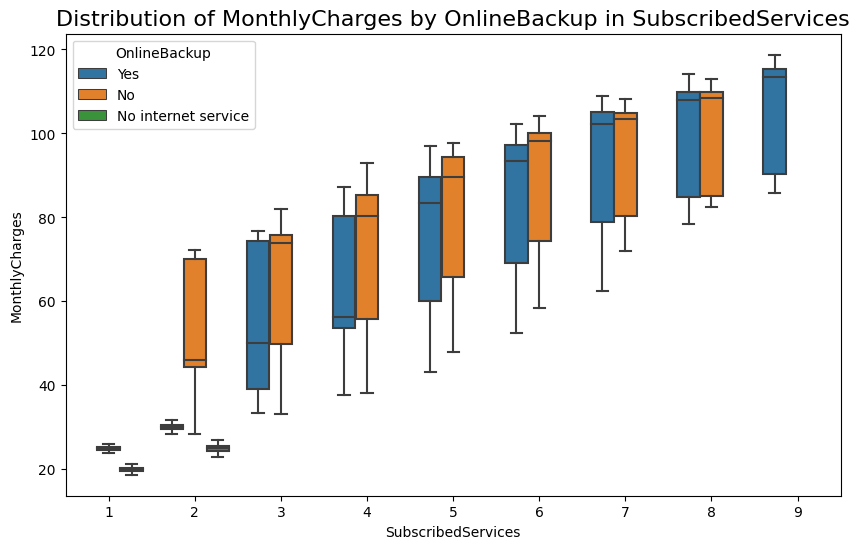

In [69]:
plot_boxplot('OnlineBackup', df)

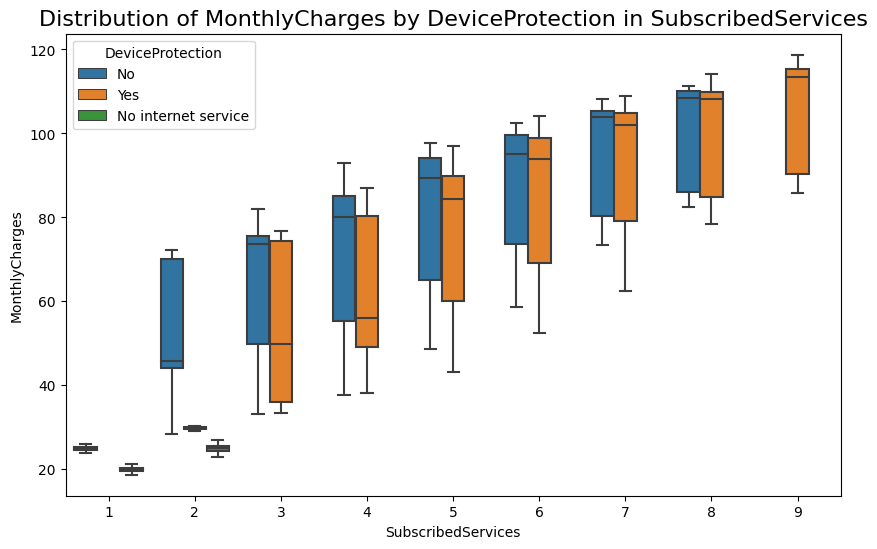

In [70]:
plot_boxplot('DeviceProtection', df)

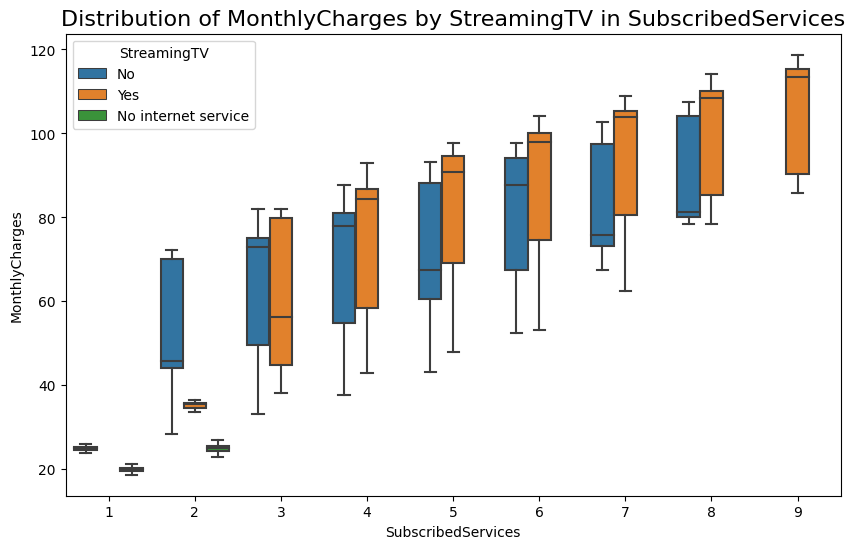

In [71]:
plot_boxplot('StreamingTV', df)

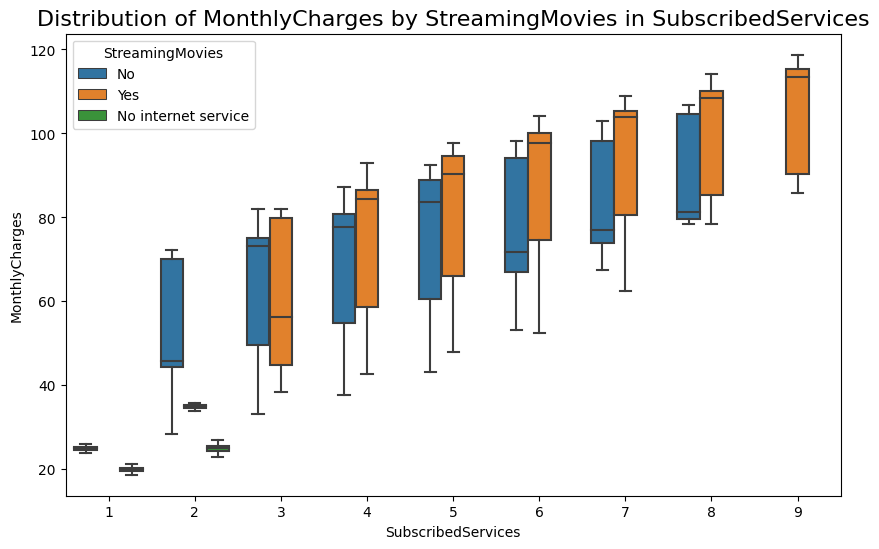

In [72]:
plot_boxplot('StreamingMovies', df)

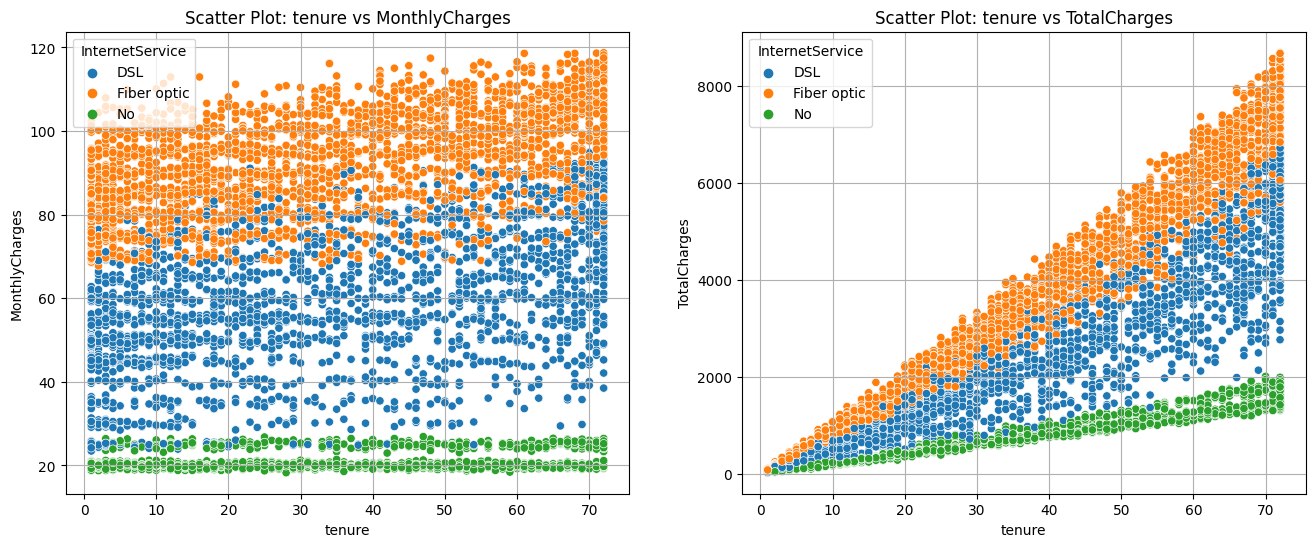

In [73]:
varTenure = 'tenure'
varMonthlyCharges = 'MonthlyCharges'
varTotalCharges = 'TotalCharges'
hue_var = 'InternetService'

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# tenure vs MonthlyCharges
sns.scatterplot(data=df, x=varTenure, y=varMonthlyCharges, hue=hue_var, ax=axes[0])
axes[0].set_title('Scatter Plot: ' + varTenure + ' vs ' + varMonthlyCharges)
axes[0].set_xlabel(varTenure)
axes[0].set_ylabel(varMonthlyCharges)
axes[0].grid(True)

# tenure vs TotalCharges
sns.scatterplot(data=df, x=varTenure, y=varTotalCharges, hue=hue_var, ax=axes[1])
axes[1].set_title('Scatter Plot: ' + varTenure + ' vs ' + varTotalCharges)
axes[1].set_xlabel(varTenure)
axes[1].set_ylabel(varTotalCharges)
axes[1].grid(True)

Text(0.5, 1.0, 'Internet Service vs Churn Rate (%)')

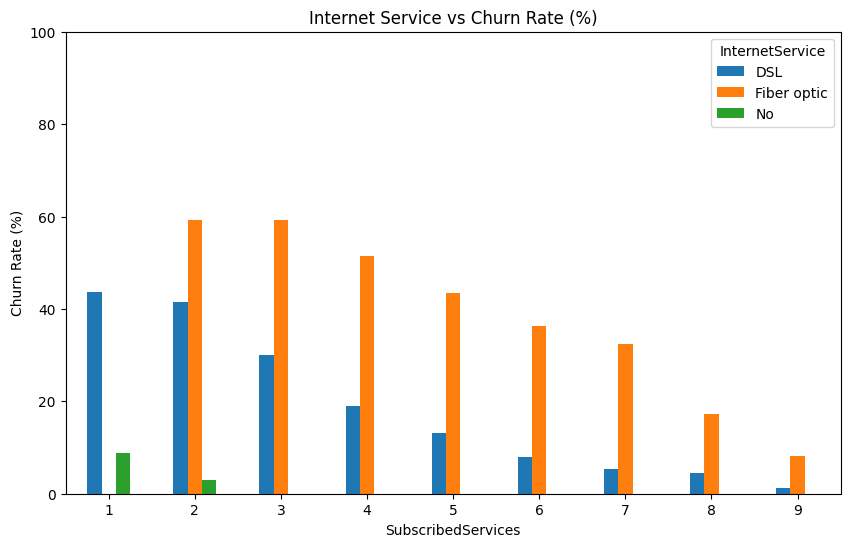

In [74]:
(pd.pivot_table(df, index='SubscribedServices', columns='InternetService', values='Churn', aggfunc='mean')*100).plot(kind='bar', figsize=(10,6))
plt.ylim(0,100)
plt.xticks(rotation=0)
plt.ylabel('Churn Rate (%)')
plt.title('Internet Service vs Churn Rate (%)')

Text(0.5, 1.0, 'Internet Service vs Monthly Charges')

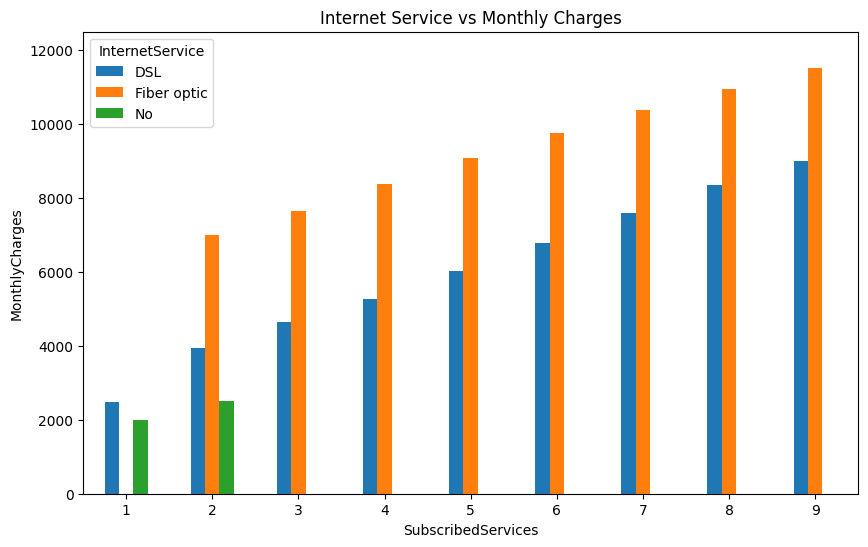

In [75]:
(pd.pivot_table(df, index='SubscribedServices', columns='InternetService', values='MonthlyCharges', aggfunc='mean')*100).plot(kind='bar', figsize=(10,6))
plt.ylim(0, 12500)
plt.xticks(rotation=0)
plt.ylabel('MonthlyCharges')
plt.title('Internet Service vs Monthly Charges')

Text(0.5, 1.0, 'Internet Service vs Total Charges')

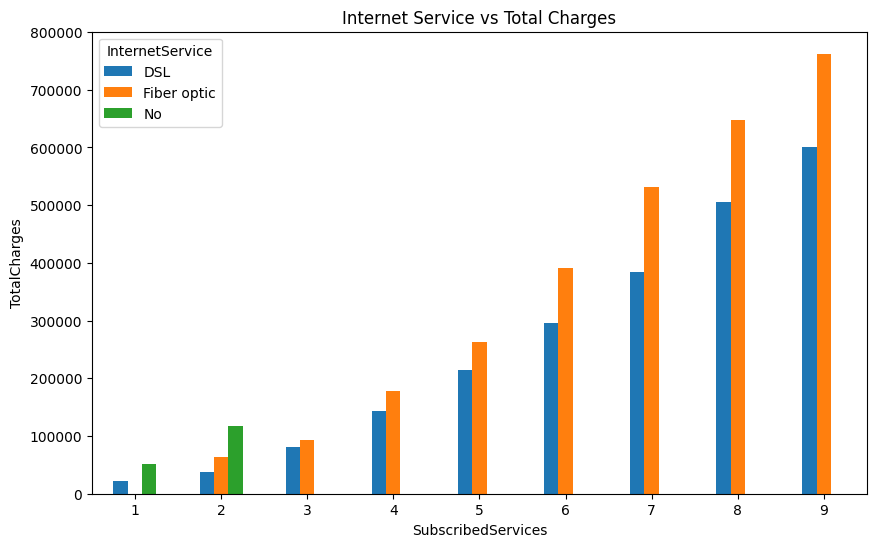

In [76]:
(pd.pivot_table(df, index='SubscribedServices', columns='InternetService', values='TotalCharges', aggfunc='mean')*100).plot(kind='bar', figsize=(10,6))
plt.xticks(rotation=0)
plt.ylabel('TotalCharges')
plt.title('Internet Service vs Total Charges')

In [77]:
print(f'tenure unique :\n {df["tenure"].unique()}\n')
print(f'tenure min : {df["tenure"].unique().min()}\n')
print(f'tenure max : {df["tenure"].unique().max()}\n')

print(f'Contract : {df["Contract"].unique()}\n')

tenure unique :
 [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]

tenure min : 1

tenure max : 72

Contract : ['Month-to-month' 'One year' 'Two year']



In [78]:
def cat_tenure(tenure):
    if tenure < 13:
        return '0-12 Months'
    elif tenure < 25:
        return '12-24 Months'
    elif tenure < 49:
        return '24-48 Months'
    else:
        return 'Over 48 Months'

In [79]:
new_df['tenureCat'] = new_df['tenure'].apply(cat_tenure)

In [80]:
new_df['tenureCat'].unique()

array(['0-12 Months', '24-48 Months', '12-24 Months', 'Over 48 Months'],
      dtype=object)

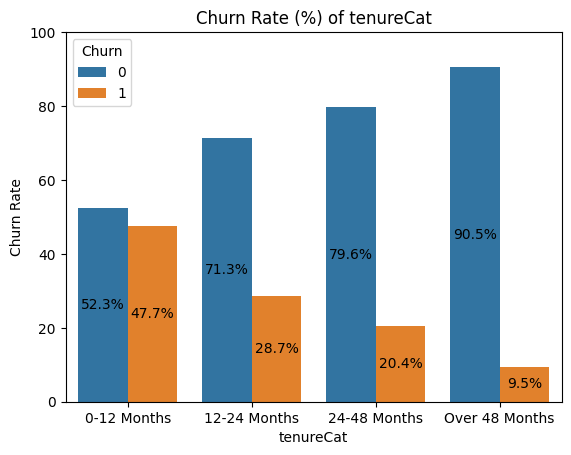

In [81]:
predictor_target(new_df, 'tenureCat')

In [82]:
check_dependency(new_df, 'tenureCat','Churn')

=== V1: tenureCat === V2: Churn ===
Chi-square Statistic : 864.0199735524177 
p-value: 5.638328081483389e-187 < 0.05 
V1 and V2 are dependent (significant association)



Text(0.5, 1.0, 'Tenure vs Contract')

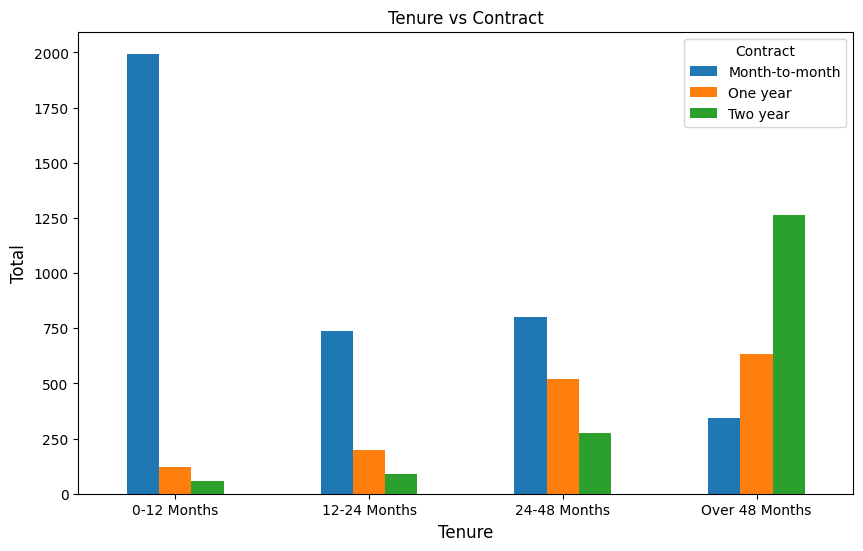

In [83]:
pd.crosstab(new_df['tenureCat'],new_df['Contract']).plot(kind='bar', figsize=(10,6))

plt.xticks(rotation=0)
plt.ylabel('Total',fontsize=12)
plt.xlabel('Tenure',fontsize=12)
plt.title('Tenure vs Contract',fontsize=12)

In [84]:
check_dependency(new_df, 'tenureCat','Contract')

=== V1: tenureCat === V2: Contract ===
Chi-square Statistic : 3160.39544920097 
p-value: 0.0 < 0.05 
V1 and V2 are dependent (significant association)



In [85]:
def tenure_sub_rate(x, y):
    if y == 'SubscribedServices':
        tenure_count = pd.crosstab(new_df[x], new_df[y]).unstack(level=1).reset_index()
    else:
        tenure_count = pd.crosstab(new_df[x], df[y]).unstack(level=1).reset_index()

    tenure_count.columns = [y, x, 'count']

    tenure_count_df = pd.DataFrame(tenure_count)

    total_customers = tenure_count_df.groupby(x)['count'].sum().reset_index()
    total_customers.columns = [x, 'Total']

    tenure_count_df = tenure_count_df.merge(total_customers, on=x)

    tenure_count_df['Percentage'] = (tenure_count_df['count'] / tenure_count_df['Total']) * 100

    # Pivot the dataframe for plotting
    df_pivot = tenure_count_df.pivot(index=x, columns=y, values='Percentage')

    if y == 'SubscribedServices':
        ax = df_pivot.plot(kind='bar', figsize=(18, 6), width=0.8)
        plt.ylim(0, 30)
        plt.title(f'{y}(%) by {x}')
    else:
        ax = df_pivot.plot(kind='bar', figsize=(10, 6), width=0.8)
        plt.ylim(0, 100)
        plt.title(f'{y} Types (%) by {x}')
    
    
    plt.xlabel(x)
    plt.ylabel('Percentage')
    plt.legend(title=x, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=0)

    # Add labels on top of bars
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                    textcoords='offset points')

    plt.tight_layout()
    plt.show()

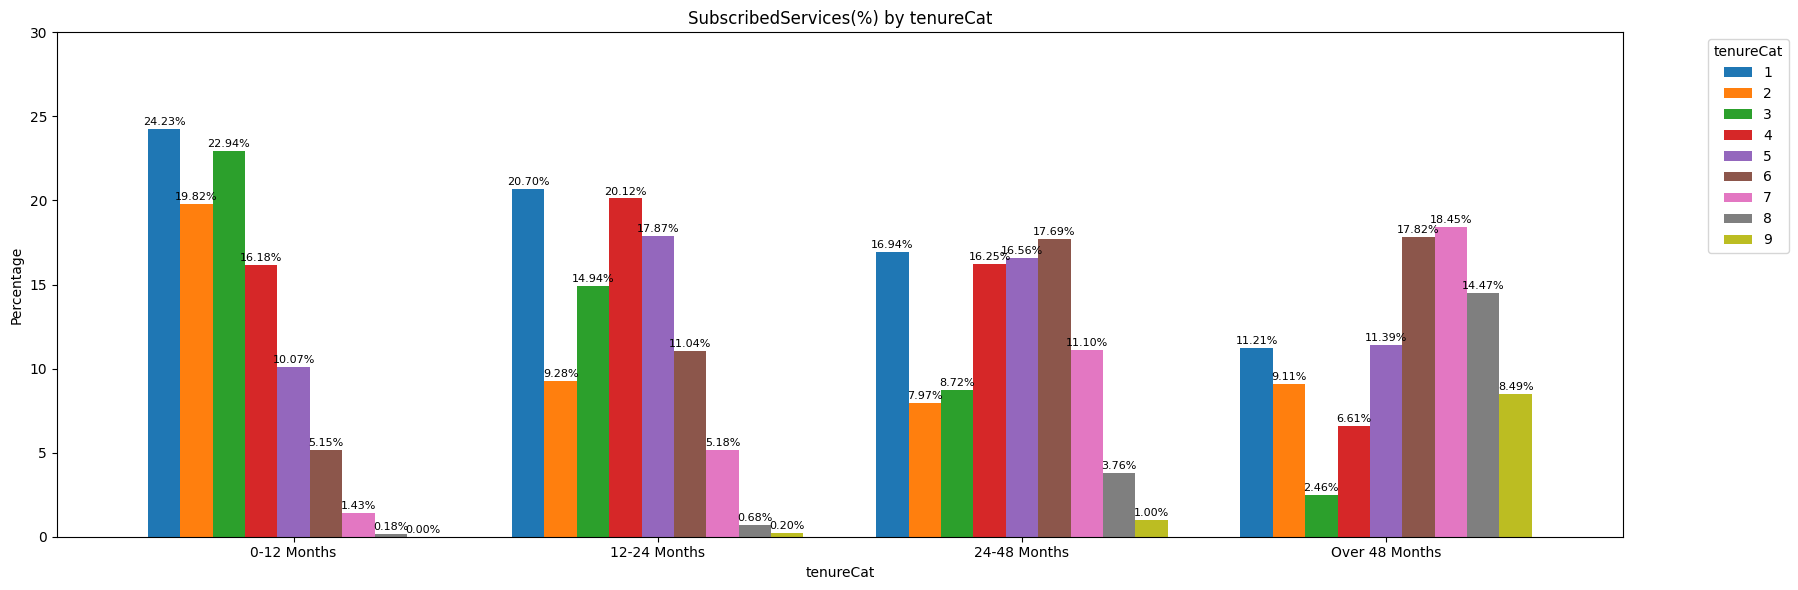

In [86]:
tenure_sub_rate('tenureCat', 'SubscribedServices')

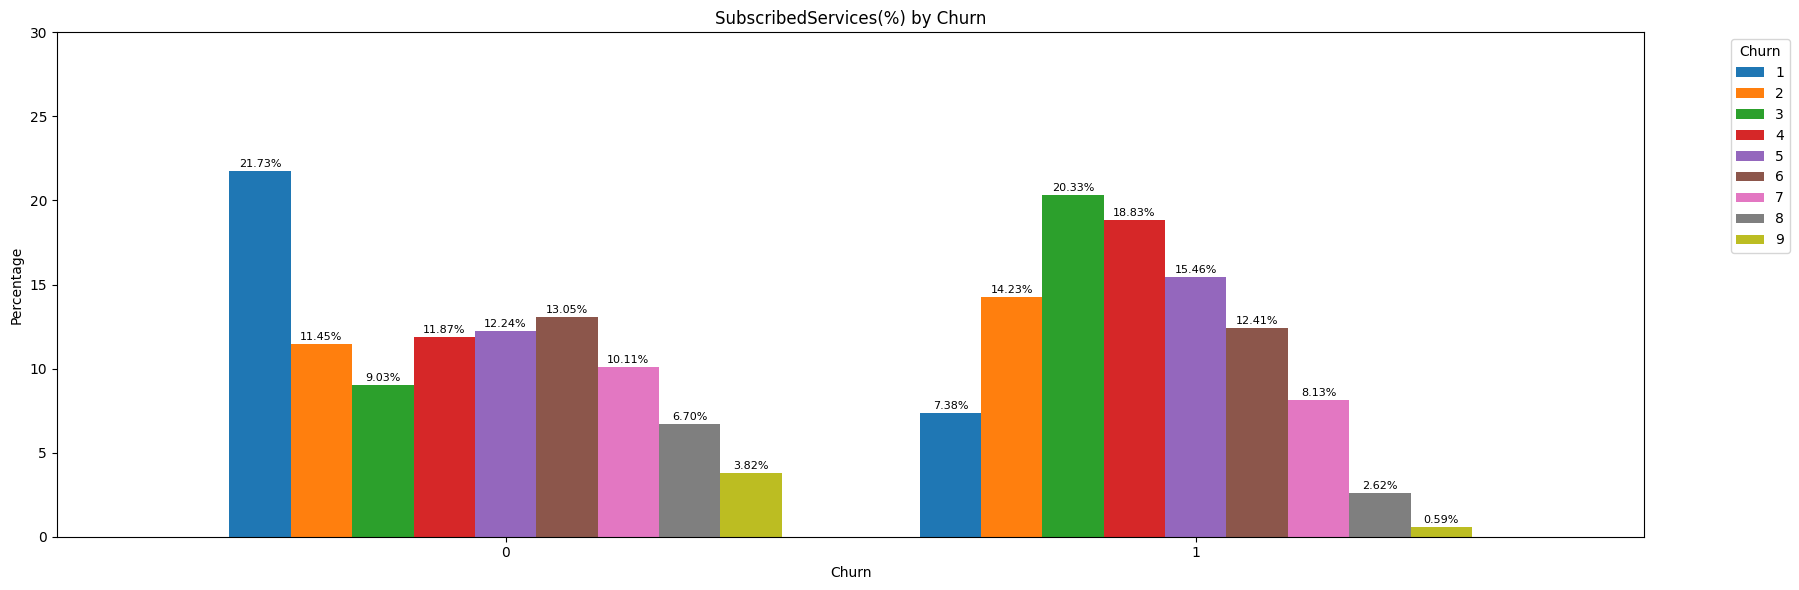

In [87]:
tenure_sub_rate('Churn', 'SubscribedServices')

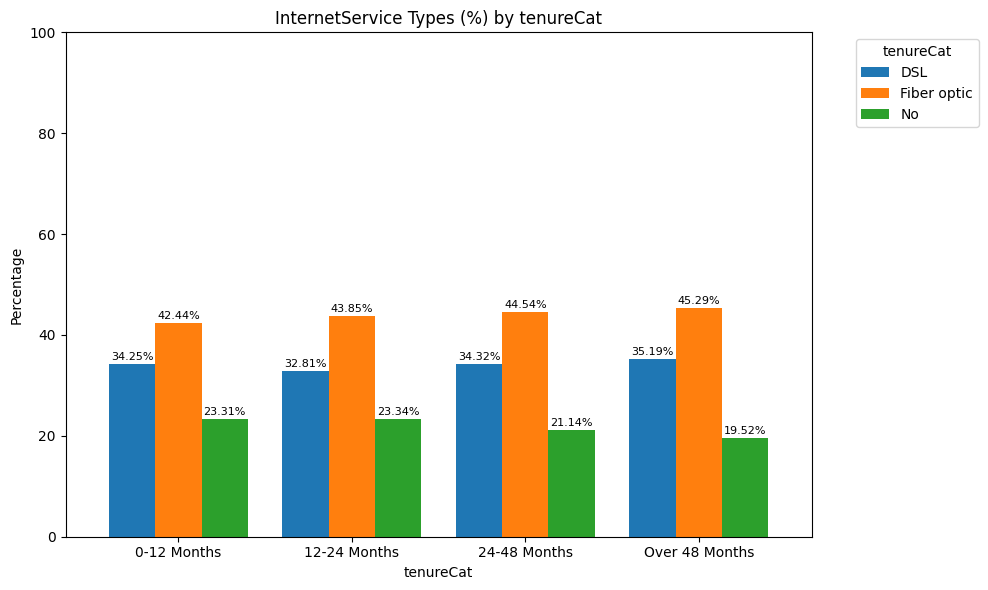

In [88]:
tenure_sub_rate('tenureCat', 'InternetService')

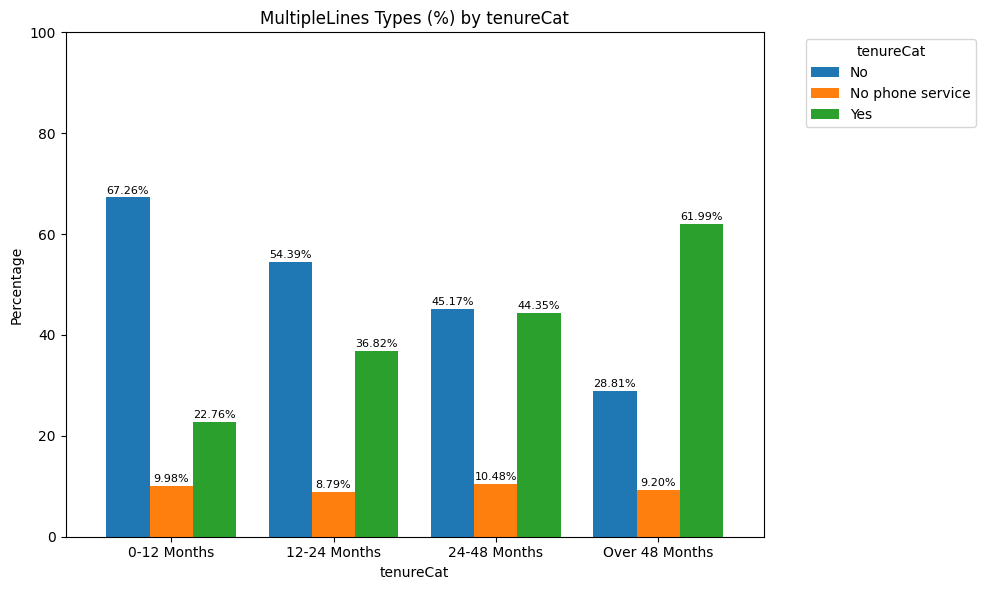

In [89]:
tenure_sub_rate('tenureCat', 'MultipleLines')

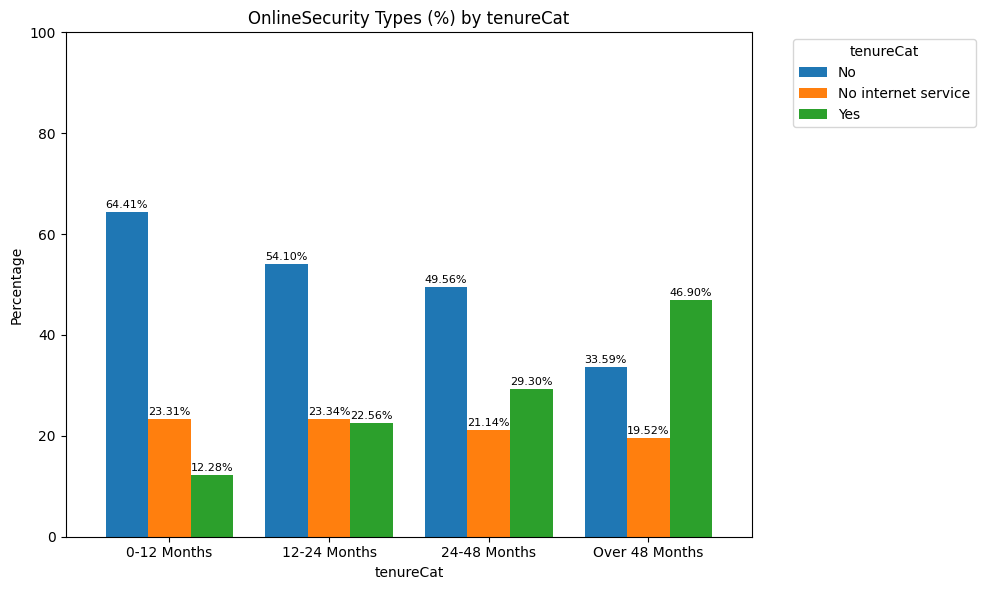

In [90]:
tenure_sub_rate('tenureCat', 'OnlineSecurity')

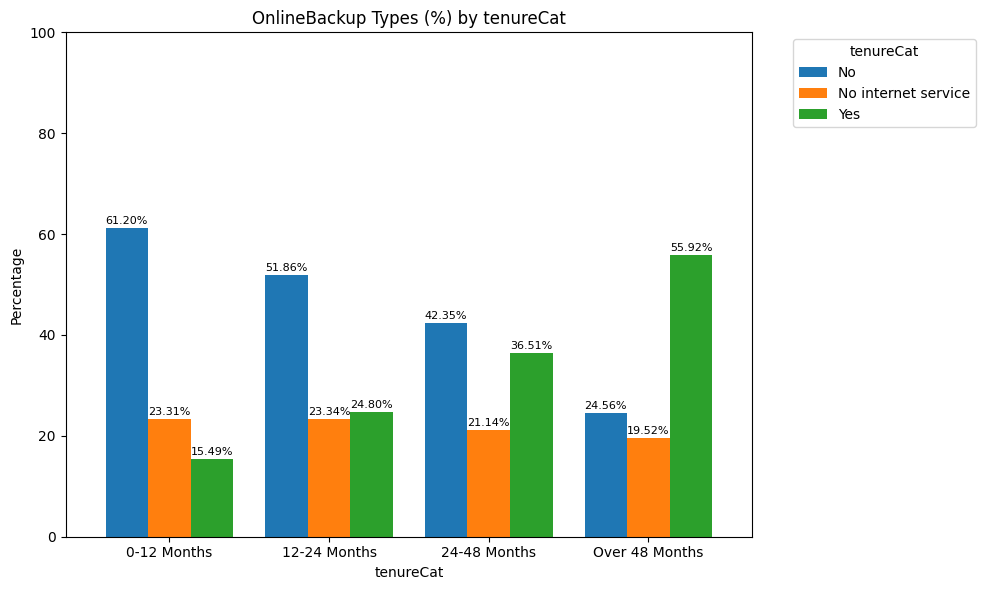

In [91]:
tenure_sub_rate('tenureCat', 'OnlineBackup')

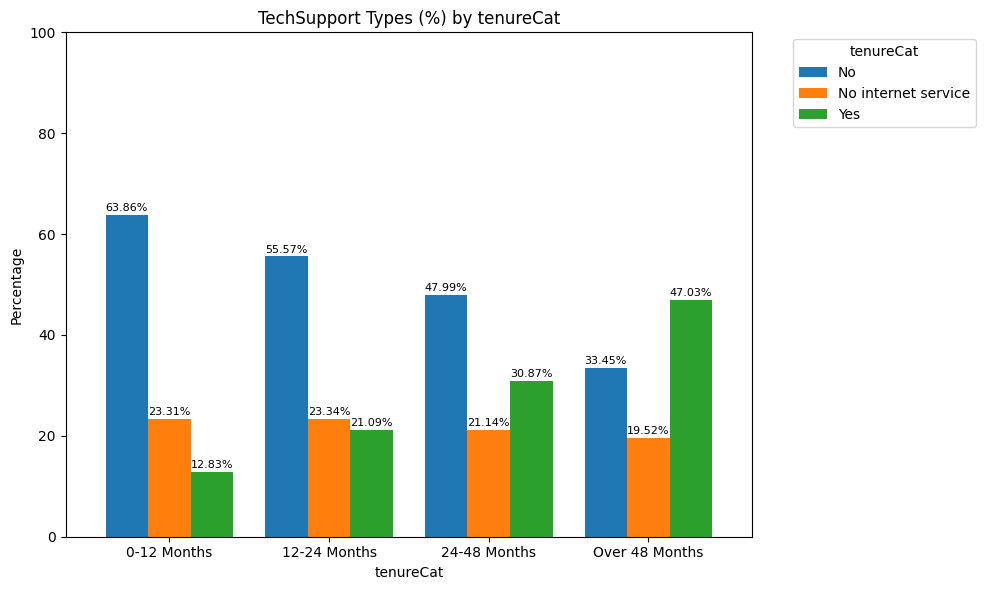

In [92]:
tenure_sub_rate('tenureCat', 'TechSupport')

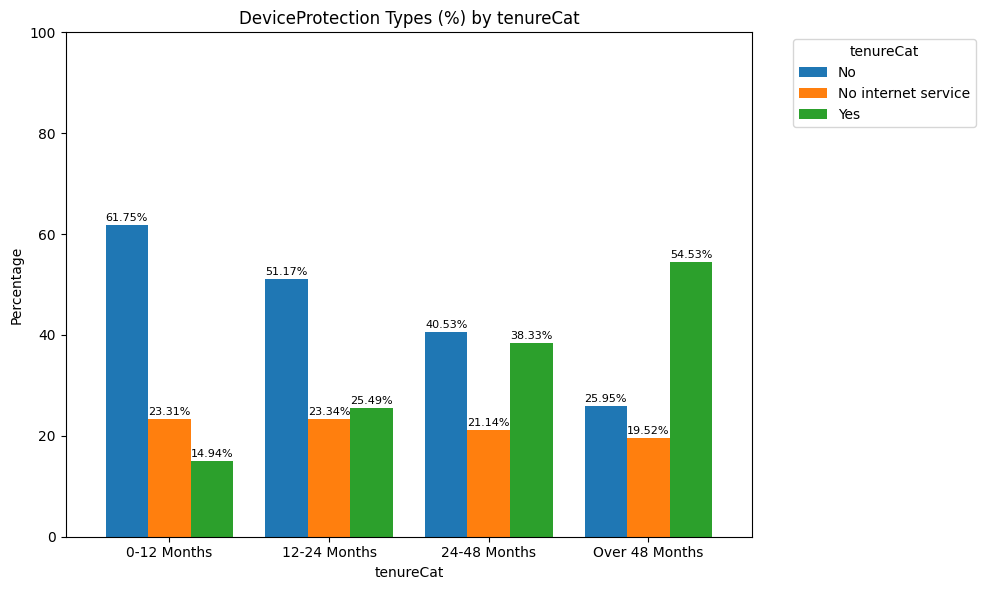

In [93]:
tenure_sub_rate('tenureCat', 'DeviceProtection')

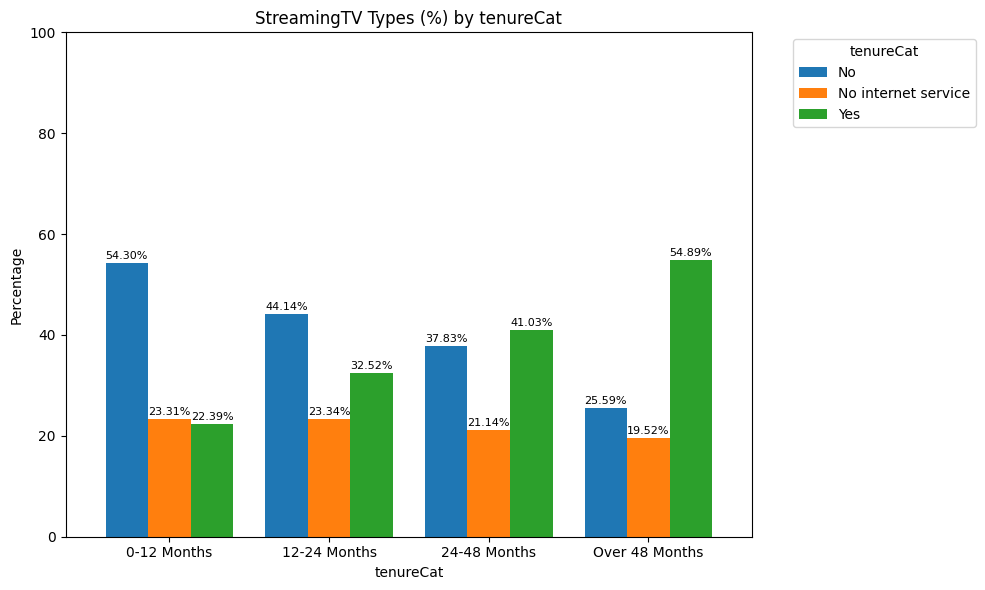

In [94]:
tenure_sub_rate('tenureCat', 'StreamingTV')

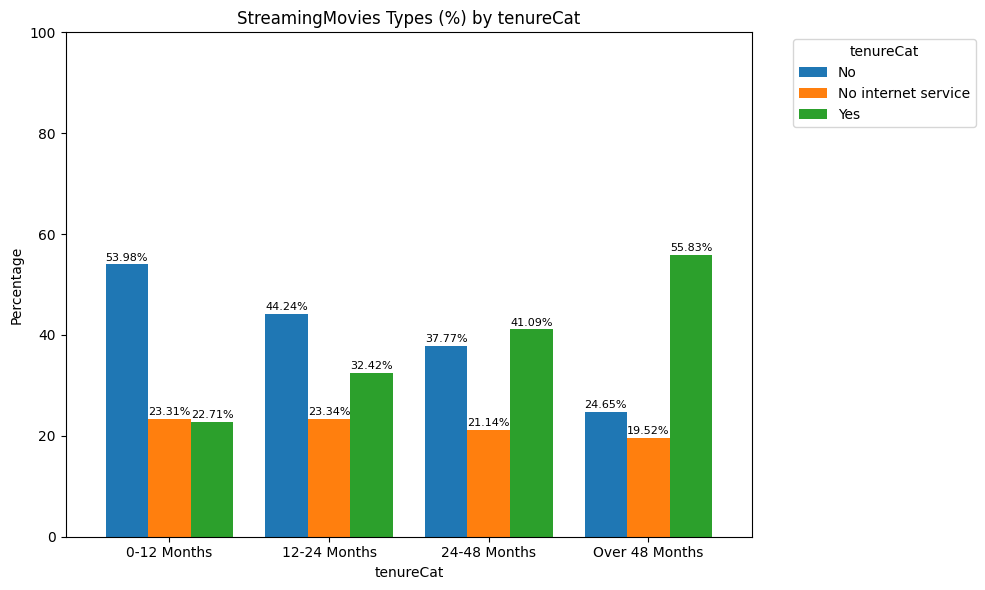

In [95]:
tenure_sub_rate('tenureCat', 'StreamingMovies')

In [96]:
dependentServices = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'StreamingMovies', 'StreamingTV', 'TechSupport', 'DeviceProtection']

In [97]:
for i in dependentServices:
    check_dependency(new_df, i, 'tenureCat')

=== V1: MultipleLines === V2: tenureCat ===
Chi-square Statistic : 711.8418178324586 
p-value: 5.678764950448439e-154 < 0.05 
V1 and V2 are dependent (significant association)

=== V1: InternetService === V2: tenureCat ===
Chi-square Statistic : 11.511397435512244 
p-value: 0.009258848147383468 < 0.05 
V1 and V2 are dependent (significant association)

=== V1: OnlineSecurity === V2: tenureCat ===
Chi-square Statistic : 668.761928814464 
p-value: 1.2457075228757717e-144 < 0.05 
V1 and V2 are dependent (significant association)

=== V1: OnlineBackup === V2: tenureCat ===
Chi-square Statistic : 847.8042158090515 
p-value: 1.8546111738494237e-183 < 0.05 
V1 and V2 are dependent (significant association)

=== V1: StreamingMovies === V2: tenureCat ===
Chi-square Statistic : 531.3489733188973 
p-value: 7.664458799290879e-115 < 0.05 
V1 and V2 are dependent (significant association)

=== V1: StreamingTV === V2: tenureCat ===
Chi-square Statistic : 512.4921302601708 
p-value: 9.362169872284552e

In [98]:
data_info(df_ori)

Rows,Columns (7032, 21)
Duplicated Values 0
=====



,missingValue,percentMissing,DataType,Unique
customerID,0,0.0,object,7032
DeviceProtection,0,0.0,object,3
TotalCharges,0,0.0,float64,6530
MonthlyCharges,0,0.0,float64,1584
PaymentMethod,0,0.0,object,4
PaperlessBilling,0,0.0,object,2
Contract,0,0.0,object,3
StreamingMovies,0,0.0,object,3
StreamingTV,0,0.0,object,3
TechSupport,0,0.0,object,3


In [99]:
df_model = df_ori.copy()

In [100]:
df_model.drop(['customerID', 'gender', 'PhoneService'], axis=1, inplace=True)

In [101]:
data_info(df_model)

Rows,Columns (7032, 18)
Duplicated Values 41
=====



,missingValue,percentMissing,DataType,Unique
SeniorCitizen,0,0.0,int64,2
Partner,0,0.0,object,2
TotalCharges,0,0.0,float64,6530
MonthlyCharges,0,0.0,float64,1584
PaymentMethod,0,0.0,object,4
PaperlessBilling,0,0.0,object,2
Contract,0,0.0,object,3
StreamingMovies,0,0.0,object,3
StreamingTV,0,0.0,object,3
TechSupport,0,0.0,object,3


In [102]:
# There are 41 duplicates, which is 0.5% of the total data so it's fine if we remove the rows and keep the first
df_model.drop_duplicates(keep = 'first', inplace = True)

In [103]:
data_info(df_model)

Rows,Columns (6991, 18)
Duplicated Values 0
=====



,missingValue,percentMissing,DataType,Unique
SeniorCitizen,0,0.0,int64,2
Partner,0,0.0,object,2
TotalCharges,0,0.0,float64,6530
MonthlyCharges,0,0.0,float64,1584
PaymentMethod,0,0.0,object,4
PaperlessBilling,0,0.0,object,2
Contract,0,0.0,object,3
StreamingMovies,0,0.0,object,3
StreamingTV,0,0.0,object,3
TechSupport,0,0.0,object,3


In [104]:
df_model.head()

,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,Yes,No,1,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,0,No,No,34,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,0,No,No,2,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,0,No,No,45,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,0,No,No,2,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [105]:
# Replace 'No' with 0 and 'Yes' with 1 in the 'Partner' column
df_model['Partner'] = df_model['Partner'].replace(['No' ,'Yes'],[0,1])

# Replace 'No' with 0 and 'Yes' with 1 in the 'Dependents' column
df_model['Dependents'] = df_model['Dependents'].replace(['No' ,'Yes'],[0,1])

# Replace 'No' with 0, 'Yes' with 1, and 'No phone service' with 0 in the 'MultipleLines' column
df_model['MultipleLines'] = df_model['MultipleLines'].replace(['No' ,'Yes', 'No phone service'],[0, 1, 0])

# Replace 'No' with 0, 'Fiber optic' with 1, and 'DSL' with 0 in the 'InternetService' column
df_model['InternetService'] = df_model['InternetService'].replace({'No': 0, 'Fiber optic': 2, 'DSL': 1})

# Replace 'No' with 0, 'Yes' with 1, and 'No internet service' with 0 in the 'OnlineSecurity' column
df_model['OnlineSecurity'] = df_model['OnlineSecurity'].replace(['No' ,'Yes', 'No internet service'],[0, 1, 0])

# Replace 'No' with 0, 'Yes' with 1, and 'No internet service' with 0 in the 'OnlineBackup' column
df_model['OnlineBackup'] = df_model['OnlineBackup'].replace(['No' ,'Yes', 'No internet service'],[0, 1, 0])

# Replace 'No' with 0, 'Yes' with 1, and 'No internet service' with 0 in the 'DeviceProtection' column
df_model['DeviceProtection'] = df_model['DeviceProtection'].replace(['No' ,'Yes', 'No internet service'],[0, 1, 0])

# Replace 'No' with 0, 'Yes' with 1, and 'No internet service' with 0 in the 'TechSupport' column
df_model['TechSupport'] = df_model['TechSupport'].replace(['No' ,'Yes', 'No internet service'],[0, 1, 0])

# Replace 'No' with 0, 'Yes' with 1, and 'No internet service' with 0 in the 'StreamingTV' column
df_model['StreamingTV'] = df_model['StreamingTV'].replace(['No' ,'Yes', 'No internet service'],[0, 1, 0])

# Replace 'No' with 0, 'Yes' with 1, and 'No internet service' with 0 in the 'StreamingMovies' column
df_model['StreamingMovies'] = df_model['StreamingMovies'].replace(['No' ,'Yes', 'No internet service'],[0, 1, 0])

# Replace 'No' with 0, 'Yes' with 1, and 'No internet service' with 0 in the 'PaperlessBilling' column
df_model['PaperlessBilling'] = df_model['PaperlessBilling'].replace(['No' ,'Yes'],[0, 1])

In [106]:
Contract_dict = {
    'Month-to-month' : 0,
    'One year' : 1,
    'Two year' : 2}

df_model['Contract'] = df_model['Contract'].map(Contract_dict)

In [107]:
df_model = pd.get_dummies(df_model, columns=['PaymentMethod']).astype(int)

In [108]:
df_model.head(5)

,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,0,1,0,1,0,0,...,0,0,1,29,29,0,0,0,1,0
1,0,0,0,34,0,1,1,0,1,0,...,0,1,0,56,1889,0,0,0,0,1
2,0,0,0,2,0,1,1,1,0,0,...,0,0,1,53,108,1,0,0,0,1
3,0,0,0,45,0,1,1,0,1,1,...,0,1,0,42,1840,0,1,0,0,0
4,0,0,0,2,0,2,0,0,0,0,...,0,0,1,70,151,1,0,0,1,0


In [109]:
data_info(df_model)

Rows,Columns (6991, 21)
Duplicated Values 167
=====



,missingValue,percentMissing,DataType,Unique
SeniorCitizen,0,0.0,int32,2
StreamingMovies,0,0.0,int32,2
PaymentMethod_Electronic check,0,0.0,int32,2
PaymentMethod_Credit card (automatic),0,0.0,int32,2
PaymentMethod_Bank transfer (automatic),0,0.0,int32,2
Churn,0,0.0,int32,2
TotalCharges,0,0.0,int32,3846
MonthlyCharges,0,0.0,int32,99
PaperlessBilling,0,0.0,int32,2
Contract,0,0.0,int32,3


In [110]:
# There are 167 duplicates, which is 2.3% of the total data after encoding (6991) so it's fine if we remove the rows and keep the first
df_model.drop_duplicates(keep = 'first', inplace = True)

In [111]:
data_info(df_model)

Rows,Columns (6824, 21)
Duplicated Values 0
=====



,missingValue,percentMissing,DataType,Unique
SeniorCitizen,0,0.0,int32,2
StreamingMovies,0,0.0,int32,2
PaymentMethod_Electronic check,0,0.0,int32,2
PaymentMethod_Credit card (automatic),0,0.0,int32,2
PaymentMethod_Bank transfer (automatic),0,0.0,int32,2
Churn,0,0.0,int32,2
TotalCharges,0,0.0,int32,3846
MonthlyCharges,0,0.0,int32,99
PaperlessBilling,0,0.0,int32,2
Contract,0,0.0,int32,3


In [112]:
df_model['Churn'].value_counts()

Churn
0    5069
1    1755
Name: count, dtype: int64

In [113]:
df_model['Churn'].value_counts(normalize=True)

Churn
0    0.742819
1    0.257181
Name: proportion, dtype: float64

In [114]:
# feature
X = df_model.drop(['Churn'],axis=1)

# target
y = df_model['Churn']

In [115]:
X_over_smote, y_over_smote = SMOTE().fit_resample(X, y)

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X_over_smote, y_over_smote, test_size=0.2, random_state=42)

In [118]:
# plt.figure(figsize=(18,6))
# for i in range(0, len(customerSpending)):
#   plt.subplot(2, 4, i+1)

#   sns.histplot(x=df[customerSpending[i]], hue = i, palette = "tab20c", 
#                legend=False, kde=True, stat="density", line_kws={'linewidth': 2}, 
#                kde_kws=dict(cut=3), alpha=.4, edgecolor=(1, 1, 1, .4))
  
#   plt.title(f'{customerSpending[i]} Distribution before Transformation')
#   plt.xlabel(customerSpending[i])
#   plt.tight_layout()

In [119]:
# plt.figure(figsize=(18,6))
# for i in range(0, len(customerSpending)):
#   plt.subplot(2, 4, i+1)

#   fitted_data, fitted_lambda = stats.boxcox(df[customerSpending[i]])

#   sns.histplot(x=fitted_data, hue = i, palette = "tab20c", 
#                legend=False, kde=True, stat="density", line_kws={'linewidth': 2}, 
#                kde_kws=dict(cut=3), alpha=.4, edgecolor=(1, 1, 1, .4))
  
#   plt.title(f'{customerSpending[i]} Distribution after Transformation')
#   plt.xlabel(customerSpending[i])
#   plt.tight_layout()

In [120]:
# plt.figure(figsize=(18,6))
# for i in range(0, len(customerSpending)):
#   plt.subplot(2, 4, i+1)

#   sns.histplot(x=np.log1p(df[customerSpending[i]]), hue = i, palette = "tab20c", 
#                legend=False, kde=True, stat="density", line_kws={'linewidth': 2}, 
#                kde_kws=dict(cut=3), alpha=.4, edgecolor=(1, 1, 1, .4))
  
#   plt.title(f'{customerSpending[i]} Distribution after Transformation')
#   plt.xlabel(customerSpending[i])
#   plt.tight_layout()

In [121]:
X_train['TotalCharges'] = np.log1p(X_train['TotalCharges'])

In [122]:
X_test['TotalCharges'] = np.log1p(X_test['TotalCharges'])

In [123]:
scaler = preprocessing.StandardScaler()

In [124]:
X_train_std = scaler.fit_transform(X_train)

In [125]:
X_train_std

array([[-0.39508744, -0.79423319, -0.53638641, ..., -0.4278762 ,
        -0.72378395, -0.44051314],
       [-0.39508744, -0.79423319, -0.53638641, ..., -0.4278762 ,
        -0.72378395, -0.44051314],
       [-0.39508744, -0.79423319, -0.53638641, ..., -0.4278762 ,
         1.38162776, -0.44051314],
       ...,
       [-0.39508744,  1.25907607, -0.53638641, ..., -0.4278762 ,
        -0.72378395, -0.44051314],
       [-0.39508744, -0.79423319,  1.86432761, ..., -0.4278762 ,
        -0.72378395, -0.44051314],
       [-0.39508744, -0.79423319, -0.53638641, ..., -0.4278762 ,
        -0.72378395, -0.44051314]])

In [126]:
X_test_std = scaler.fit_transform(X_test)

In [127]:
X_test_std

array([[-0.41340137, -0.77990219, -0.51413923, ..., -0.43605142,
         1.41578404, -0.43765211],
       [ 2.41895667,  1.28221207, -0.51413923, ...,  2.29330749,
        -0.70632241, -0.43765211],
       [-0.41340137,  1.28221207, -0.51413923, ..., -0.43605142,
        -0.70632241, -0.43765211],
       ...,
       [-0.41340137, -0.77990219, -0.51413923, ..., -0.43605142,
         1.41578404, -0.43765211],
       [ 2.41895667, -0.77990219, -0.51413923, ..., -0.43605142,
        -0.70632241, -0.43765211],
       [-0.41340137, -0.77990219, -0.51413923, ..., -0.43605142,
        -0.70632241, -0.43765211]])

In [128]:
X_train.head()

,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
7605,0,0,0,1,0,0,0,0,0,0,0,0,0,0,20,3.044522,0,0,0,0
8049,0,0,0,18,0,2,0,0,0,0,1,0,0,0,92,7.483244,0,0,0,0
9446,0,0,0,1,0,2,0,0,0,0,0,0,0,1,80,4.394449,0,0,1,0
2684,0,0,0,64,1,2,0,0,1,1,1,1,1,1,104,8.837826,0,1,0,0
9404,0,0,0,6,0,0,0,0,0,0,0,0,0,0,19,4.948760,1,0,0,0


In [129]:
y_train.head()

7605    1
8049    1
9446    1
2684    0
9404    1
Name: Churn, dtype: int32

In [130]:
logreg = LogisticRegression(random_state=42)

Confusion Matrix : 
[[3405  653]
 [ 608 3444]]

 Accuracy : 0.8445129469790382
 Recall Score : 0.8499506416584403
 Precision Score : 0.840615084207957
 F1 Score : 0.8452570867591116
 ROC-AUC Score : 0.9267608813370978

 Recall scores for each fold: [0.83353884 0.83107275 0.84814815 0.8617284  0.86419753]
 Average recall score: 0.8477371329405855


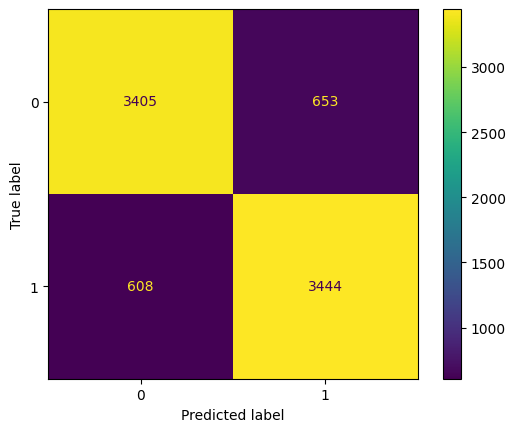

In [131]:
train_eval(X_train_std, y_train, logreg)

Confusion Matrix : 
[[859 152]
 [166 851]]

 Accuracy : 0.8431952662721893
 Recall Score : 0.8367748279252704
 Precision Score : 0.8484546360917248
 F1 Score : 0.8425742574257425
 ROC-AUC Score : 0.9245147040373005


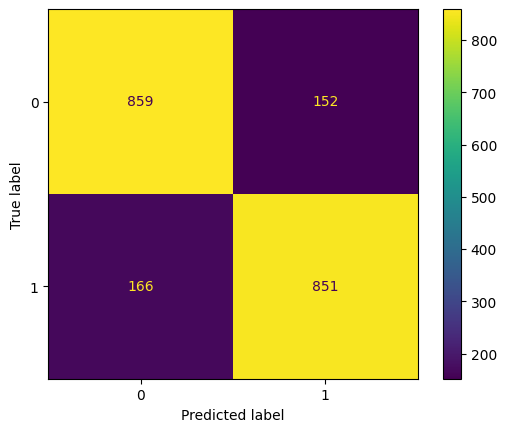

In [132]:
test_eval(X_test_std, y_test, logreg)

In [133]:
knn = KNeighborsClassifier()

Confusion Matrix : 
[[3502  556]
 [ 455 3597]]

 Accuracy : 0.8753390875462392
 Recall Score : 0.8877097729516288
 Precision Score : 0.8661208764748375
 F1 Score : 0.876782449725777
 ROC-AUC Score : 0.9540972896942994

 Recall scores for each fold: [0.81750925 0.8162762  0.83950617 0.84444444 0.84814815]
 Average recall score: 0.8331768430987502


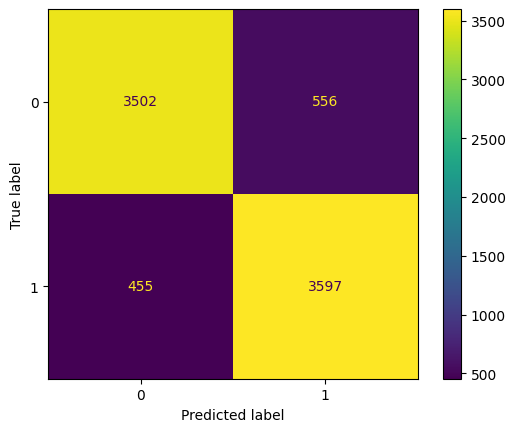

In [134]:
train_eval(X_train_std, y_train, knn)

Confusion Matrix : 
[[820 191]
 [172 845]]

 Accuracy : 0.8210059171597633
 Recall Score : 0.8308751229105211
 Precision Score : 0.8156370656370656
 F1 Score : 0.8231855820750121
 ROC-AUC Score : 0.8949986724204838


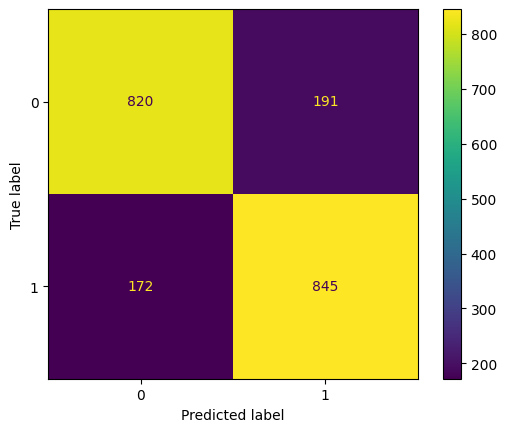

In [135]:
test_eval(X_test_std, y_test, knn)

In [136]:
dt = DecisionTreeClassifier(random_state=42)

Confusion Matrix : 
[[4037   21]
 [   7 4045]]

 Accuracy : 0.9965474722564734
 Recall Score : 0.9982724580454096
 Precision Score : 0.9948352188883424
 F1 Score : 0.9965508745996551
 ROC-AUC Score : 0.9999593748494802

 Recall scores for each fold: [0.79901356 0.8027127  0.81234568 0.82962963 0.80987654]
 Average recall score: 0.8107156231447229


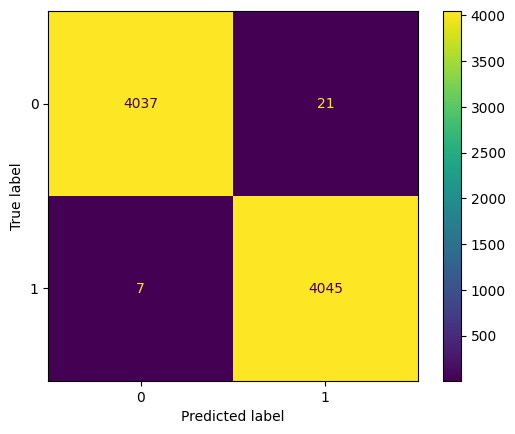

In [137]:
train_eval(X_train_std, y_train, dt)

Confusion Matrix : 
[[811 200]
 [237 780]]

 Accuracy : 0.784516765285996
 Recall Score : 0.7669616519174042
 Precision Score : 0.7959183673469388
 F1 Score : 0.7811717576364547
 ROC-AUC Score : 0.7856547495737644


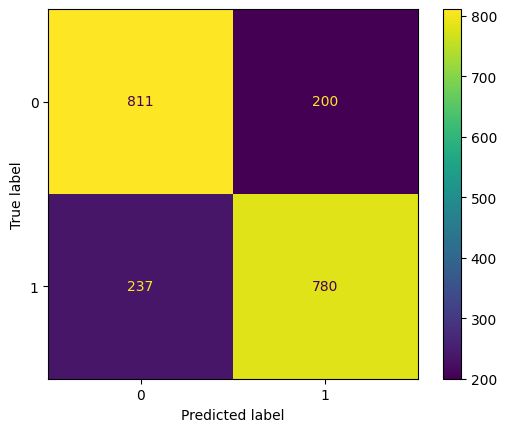

In [138]:
test_eval(X_test_std, y_test, dt)

In [139]:
rf = RandomForestClassifier(random_state=42)

Confusion Matrix : 
[[4032   26]
 [   2 4050]]

 Accuracy : 0.9965474722564734
 Recall Score : 0.9995064165844028
 Precision Score : 0.9936211972522081
 F1 Score : 0.9965551181102363
 ROC-AUC Score : 0.9996799857155159

 Recall scores for each fold: [0.83970407 0.83970407 0.84938272 0.8617284  0.85802469]
 Average recall score: 0.849708788114049


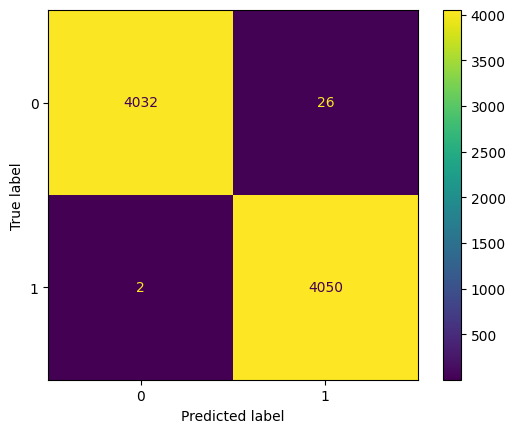

In [140]:
train_eval(X_train_std, y_train, rf)

Confusion Matrix : 
[[850 161]
 [164 853]]

 Accuracy : 0.8397435897435898
 Recall Score : 0.8387413962635202
 Precision Score : 0.8412228796844181
 F1 Score : 0.8399803052683407
 ROC-AUC Score : 0.9245361009232756


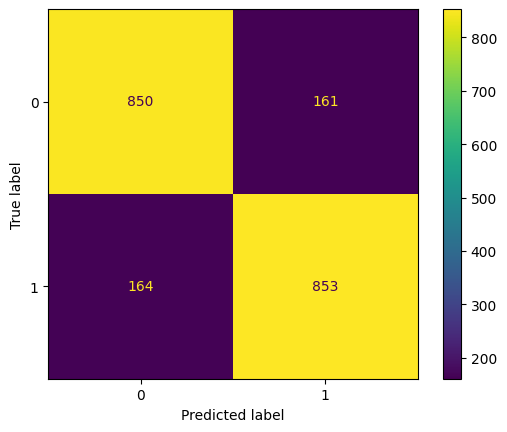

In [141]:
test_eval(X_test_std, y_test, rf)

In [142]:
nb = GaussianNB()

Confusion Matrix : 
[[3243  815]
 [ 736 3316]]

 Accuracy : 0.8087546239210851
 Recall Score : 0.8183613030602171
 Precision Score : 0.8027112079399661
 F1 Score : 0.8104607112305999
 ROC-AUC Score : 0.8842639939047678

 Recall scores for each fold: [0.80764488 0.79408138 0.82469136 0.82469136 0.8345679 ]
 Average recall score: 0.8171353762311429


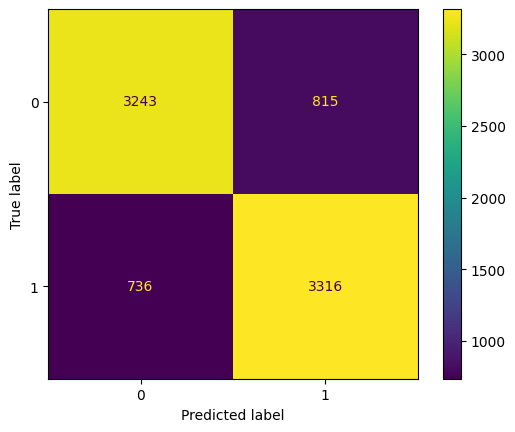

In [143]:
train_eval(X_train_std, y_train, nb)

Confusion Matrix : 
[[808 203]
 [176 841]]

 Accuracy : 0.8131163708086785
 Recall Score : 0.8269419862340216
 Precision Score : 0.8055555555555556
 F1 Score : 0.8161086851043183
 ROC-AUC Score : 0.8817540000019453


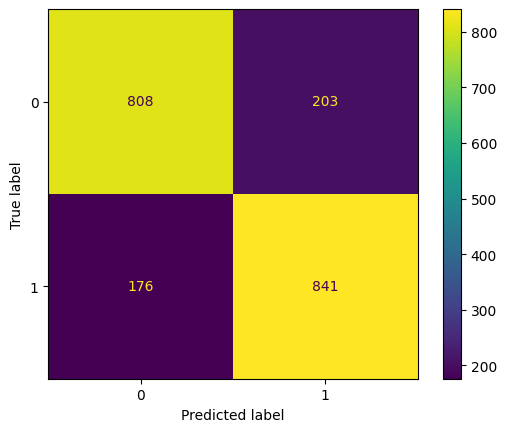

In [144]:
test_eval(X_test_std, y_test, nb)